<a href="https://colab.research.google.com/github/antonellagambarte/proyecto-final-CEIA/blob/main/LIMPIEZA_DATASET_NHANES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


In [ ]:


# Leer el archivo
ruta_archivo = '/content/drive/My Drive/NHANES/df_min.csv'
# Definimos qué columnas queremos forzar como enteros
tipos_forzados = {
    'genero': 'int64',
    'raza_origen': 'int64',
    'diabetes': 'int64',
    'hipertension': 'int64',
    'fam_cardio': 'int64',
}

# 2. Leé el archivo pasando el argumento dtype
# Usamos 'Int64'
df = pd.read_csv(ruta_archivo, dtype=tipos_forzados)
# df = pd.read_csv(ruta_archivo)

# Verificar que los datos llegaron bien
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5568 entries, 0 to 5567
Data columns (total 61 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id_paciente                             5568 non-null   float64
 1   tipo_entrevista                         5568 non-null   float64
 2   edad                                    5568 non-null   float64
 3   genero                                  5568 non-null   int64  
 4   presion_sis_1                           4658 non-null   float64
 5   presion_sis_2                           4885 non-null   float64
 6   presion_sis_3                           4872 non-null   float64
 7   colesterol_total                        4936 non-null   float64
 8   hdl                                     4936 non-null   float64
 9   ldl                                     2368 non-null   float64
 10  trigliceridos                           2393 non-null   floa

In [ ]:
print(df['diabetes'].value_counts().sort_index())

diabetes
1     876
2    4516
3     172
9       4
Name: count, dtype: int64


In [ ]:
# Diccionario optimizado con todas las variables que presentan códigos de error
criterios_error = {
    # Variables con códigos 7 y 9
    'fam_cardio': [7, 9], 'fam_asma': [7, 9], 'fam_diabetes': [7, 9],
    'diabetes': [7, 9], 'hipertension': [7, 9], 'act_caminar_bici': [7, 9],
    'act_moderada': [7, 9], 'anhedonia': [7, 9], 'deprimido_decaido': [7, 9],
    'prediabetes_glucosa_alterada': [7, 9], 'colesterol_alto': [7, 9],
    'medicacion_colesterol': [7, 9], 'riñones_debiles_fallando': [7, 9],

    # Variables con códigos 77 y 99
    'actividad_deportiva_moderada_x_semana': [77, 99],
    'consumo_alcohol_ultimo_año': [77, 99],
    'consumo_excesivo_alcohol_ultimo_año': [77, 99],
    'horas_suenio': [77, 99],

    # Variables con códigos 777 y 999
    'alcohol_promedio': [777, 999],
    'veces_consumo_excesivo_alcohol_30_dias': [777, 999]
}

print(f"{'Variable':<40} | {'Casos de Error':<15} | {'% del Total':<10}")
print("-" * 75)

total_filas = len(df)

for col, codigos in criterios_error.items():
    if col in df.columns:
        cantidad = df[col].isin(codigos).sum()
        porcentaje = (cantidad / total_filas) * 100
        print(f"{col:<40} | {cantidad:<15} | {porcentaje:>8.2f}%")

Variable                                 | Casos de Error  | % del Total
---------------------------------------------------------------------------
fam_cardio                               | 127             |     2.28%
fam_asma                                 | 111             |     1.99%
fam_diabetes                             | 81              |     1.45%
diabetes                                 | 4               |     0.07%
hipertension                             | 10              |     0.18%
act_caminar_bici                         | 6               |     0.11%
act_moderada                             | 5               |     0.09%
anhedonia                                | 7               |     0.13%
deprimido_decaido                        | 6               |     0.11%
prediabetes_glucosa_alterada             | 6               |     0.11%
colesterol_alto                          | 39              |     0.70%
medicacion_colesterol                    | 13              |     0.23%

In [ ]:
print(f"{'Variable':<35} | {'No Sabe (%)':<15} | {'Rechazó (%)':<15} | {'Total Error':<10}")
print("-" * 85)

total_filas = len(df)

for col, codigos in criterios_error.items():
    if col in df.columns:
        # Identificamos cuáles son de cada tipo basándonos en tu diccionario
        cod_rechazo = [c for c in codigos if str(c).startswith('7')]
        cod_nosabe = [c for c in codigos if str(c).startswith('9')]

        # Contamos casos
        cant_rechazo = df[col].isin(cod_rechazo).sum()
        cant_nosabe = df[col].isin(cod_nosabe).sum()
        total_err = cant_rechazo + cant_nosabe

        # Calculamos porcentajes
        porc_rechazo = (cant_rechazo / total_filas) * 100
        porc_nosabe = (cant_nosabe / total_filas) * 100

        # Formateo de salida
        print(f"{col:<35} | {cant_nosabe:>4} ({porc_nosabe:>5.2f}%) | {cant_rechazo:>4} ({porc_rechazo:>5.2f}%) | {total_err:>8}")

Variable                            | No Sabe (%)     | Rechazó (%)     | Total Error
-------------------------------------------------------------------------------------
fam_cardio                          |  126 ( 2.26%) |    1 ( 0.02%) |      127
fam_asma                            |  111 ( 1.99%) |    0 ( 0.00%) |      111
fam_diabetes                        |   80 ( 1.44%) |    1 ( 0.02%) |       81
diabetes                            |    4 ( 0.07%) |    0 ( 0.00%) |        4
hipertension                        |   10 ( 0.18%) |    0 ( 0.00%) |       10
act_caminar_bici                    |    6 ( 0.11%) |    0 ( 0.00%) |        6
act_moderada                        |    5 ( 0.09%) |    0 ( 0.00%) |        5
anhedonia                           |    4 ( 0.07%) |    3 ( 0.05%) |        7
deprimido_decaido                   |    4 ( 0.07%) |    2 ( 0.04%) |        6
prediabetes_glucosa_alterada        |    6 ( 0.11%) |    0 ( 0.00%) |        6
colesterol_alto                     | 

Los valores como 9, 99 o 999, 77, 777 son códigos técnicos que indican que el paciente no conocía la respuesta o prefirió no contestar. Es fundamental transformarlos en valores nulos porque, de lo contrario, el modelo los interpretaría como cifras médicas reales, lo que provocaría diagnósticos erróneos al considerar un código administrativo como un valor de salud extremo.

Dado que los porcentajes no son altos, se les asigna NaN para luego imputarlos

In [ ]:
# for col, codigos in criterios_error.items():
#     if col in df.columns:
#         # Reemplazamos los códigos de error por NaN
#         df[col] = df[col].replace(codigos, np.nan)

In [ ]:
import numpy as np

# Iteramos sobre tu diccionario original
for col, codigos in criterios_error.items():
    if col in df.columns:
        # Filtramos para obtener SOLO los códigos que empiezan con 7 (Rechazos)
        codigos_rechazo = [c for c in codigos if str(c).startswith('7')]

        # Aplicamos el reemplazo directamente en el df que venías usando
        if codigos_rechazo:
            df[col] = df[col].replace(codigos_rechazo, np.nan)

# Verificación rápida
print("✅ Limpieza de 'Rechazos' completada.")
print(f"Total de NaNs actuales en el dataset: {df.isnull().sum().sum()}")

✅ Limpieza de 'Rechazos' completada.
Total de NaNs actuales en el dataset: 55965


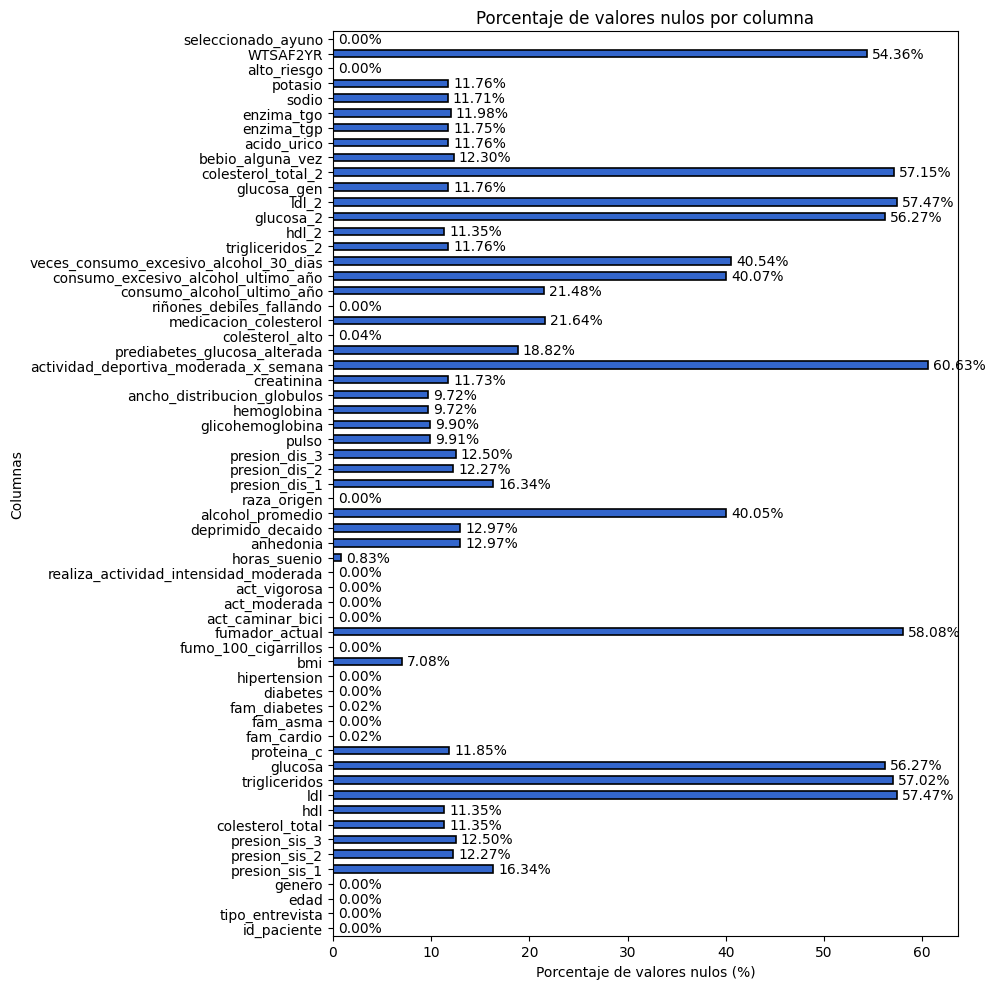

In [ ]:
porcentaje_nulos = df.isna().mean().round(4) * 100

plt.figure(figsize=(10, 10))
porcentaje_nulos.plot(kind='barh', color="#3366CC", edgecolor='black', linewidth=1.2)

plt.title('Porcentaje de valores nulos por columna')
plt.xlabel('Porcentaje de valores nulos (%)')
plt.ylabel('Columnas')

for index, value in enumerate(porcentaje_nulos):
    plt.text(value + 0.5, index, f'{value:.2f}%', va='center')

plt.tight_layout()
plt.show()

### **SPLIT DATASET**

In [ ]:
df_train, df_test = train_test_split(
    df,
    test_size=0.2,
    stratify=df['alto_riesgo'],
    random_state=42
)

# Create explicit copies of `df_train` and `df_test`.
df_train = df_train.copy()
df_test = df_test.copy()

print(f"Shape of df_train: {df_train.shape}")
print(f"Shape of df_test: {df_test.shape}")
print(f"Distribution of 'alto_riesgo' in df_train:\n{df_train['alto_riesgo'].value_counts(normalize=True)}")
print(f"Distribution of 'alto_riesgo' in df_test:\n{df_test['alto_riesgo'].value_counts(normalize=True)}")

Shape of df_train: (4454, 61)
Shape of df_test: (1114, 61)
Distribution of 'alto_riesgo' in df_train:
alto_riesgo
0    0.875842
1    0.124158
Name: proportion, dtype: float64
Distribution of 'alto_riesgo' in df_test:
alto_riesgo
0    0.876122
1    0.123878
Name: proportion, dtype: float64


In [ ]:
print(df['diabetes'].value_counts().sort_index())

diabetes
1     876
2    4516
3     172
9       4
Name: count, dtype: int64


### **BMI**

In [ ]:
print("--- PERFIL DE NULOS EN BMI ---")

# 1. ¿Cuántos nulos hay realmente?
total_nulos_bmi = df['bmi'].isnull().sum()
print(f"Total nulos: {total_nulos_bmi} ({ (total_nulos_bmi/len(df))*100 :.2f}%)")

# 2. ¿Hay sesgo de género?
print("\nDistribución por Género en nulos de BMI:")
print(df[df['bmi'].isnull()]['genero'].value_counts(normalize=True))

# 3. ¿Hay sesgo por Edad?
print("\nEdad promedio de los nulos:")
print(df[df['bmi'].isnull()]['edad'].mean())
print("Edad promedio de los NO nulos:")
print(df[df['bmi'].notnull()]['edad'].mean())

# 4. ¿Están relacionados con los nulos de presión?
# Usamos 'presion_sis_1' que ya viene en el CSV original
ambos_nulos = df[df['bmi'].isnull() & df['presion_sis_1'].isnull()].shape[0]
print(f"\nPacientes que no tienen NI presión (Medida 1) NI BMI: {ambos_nulos}")

--- PERFIL DE NULOS EN BMI ---
Total nulos: 394 (7.08%)

Distribución por Género en nulos de BMI:
genero
1    0.530457
2    0.469543
Name: proportion, dtype: float64

Edad promedio de los nulos:
54.9263959390863
Edad promedio de los NO nulos:
51.24101275608813

Pacientes que no tienen NI presión (Medida 1) NI BMI: 335


Imputación con mediana por rango de edad

In [ ]:
# # 1. Crear el rango de edad (décadas) para que la imputación sea biológicamente coherente
# df['rango_edad'] = (df['edad'] // 10) * 10

# # 2. Realizar la imputación por estratos
# # Esto asigna la mediana de BMI de personas del mismo sexo y rango de edad
# df['bmi'] = df.groupby(['genero', 'rango_edad'])['bmi'].transform(lambda x: x.fillna(x.median()))

# # 3. Red de seguridad
# # Por si existe algún grupo demográfico sin ningún dato (muy poco probable en NHANES)
# if df['bmi'].isnull().any():
#     df['bmi'] = df['bmi'].fillna(df['bmi'].median())

# print("--- VERIFICACIÓN DE BMI ---")
# print(f"Nulos restantes en BMI: {df['bmi'].isnull().sum()}")
# print(f"Estadísticas del BMI post-imputación:\n{df['bmi'].describe()}")

In [ ]:
# Se crear el rango de edad (décadas) para que la imputación
df_train['rango_edad'] = (df_train['edad'] // 10) * 10
df_test['rango_edad'] = (df_test['edad'] // 10) * 10

# Cálculo de mediana para df_train
bmi_medians = df_train.groupby(['genero', 'rango_edad'])['bmi'].median()

# Imputación en df_train
df_train['bmi'] = df_train.groupby(['genero', 'rango_edad'])['bmi'].transform(
    lambda x: x.fillna(x.median())
)

# Imputación en test usando medianas calculadas para train
for index, row in df_test[df_test['bmi'].isnull()].iterrows():
    gender = row['genero']
    age_range = row['rango_edad']
    if (gender, age_range) in bmi_medians.index:
        df_test.loc[index, 'bmi'] = bmi_medians.loc[(gender, age_range)]


overall_median_bmi_train = df_train['bmi'].median()
df_train['bmi'] = df_train['bmi'].fillna(overall_median_bmi_train)
df_test['bmi'] = df_test['bmi'].fillna(overall_median_bmi_train)

# Se borra rango_edad
df_train.drop(columns=['rango_edad'], inplace=True)
df_test.drop(columns=['rango_edad'], inplace=True)

print("BMI imputation complete.")
print(f"Missing BMI in df_train: {df_train['bmi'].isnull().sum()}")
print(f"Missing BMI in df_test: {df_test['bmi'].isnull().sum()}")

BMI imputation complete.
Missing BMI in df_train: 0
Missing BMI in df_test: 0


### **diabetes**

In [ ]:
# Llenar con el valor que más se repite (el 2.0 que es 'No')
moda_diab = df_train['diabetes'].mode()[0]
df_train['diabetes'] = df_train['diabetes'].fillna(moda_diab)
df_test['diabetes'] = df_test['diabetes'].fillna(moda_diab)

In [ ]:
print(df['diabetes'].value_counts().sort_index())

diabetes
1     876
2    4516
3     172
9       4
Name: count, dtype: int64


### **PRESION**

En este caso, se tienen 3 medidas. Primero, para cada fila, vamos a hacer el promedio de los valores que se tengan para que obtengamos una sola columna con los valores de presion sistolica y otra distolica.

In [ ]:
# Lista de columnas de presión
columnas_presion = [
    'presion_sis_1', 'presion_sis_2', 'presion_sis_3',
    'presion_dis_1', 'presion_dis_2', 'presion_dis_3'
]

# Contamos cuántos ceros hay en cada una
for col in columnas_presion:
    ceros = (df[col] == 0).sum()
    nulos = df[col].isna().sum()
    print(f"{col}: {ceros} valores en cero | {nulos} valores nulos (NaN)")

presion_sis_1: 0 valores en cero | 910 valores nulos (NaN)
presion_sis_2: 0 valores en cero | 683 valores nulos (NaN)
presion_sis_3: 0 valores en cero | 696 valores nulos (NaN)
presion_dis_1: 37 valores en cero | 910 valores nulos (NaN)
presion_dis_2: 24 valores en cero | 683 valores nulos (NaN)
presion_dis_3: 19 valores en cero | 696 valores nulos (NaN)


como se vio en la etapa de EDA, existían algunos valores de presión distólica en cero. Se procede a asignarles NAN.

In [ ]:
# 1. Convertimos los ceros de las diastólicas en NaN
for col in ['presion_dis_1', 'presion_dis_2', 'presion_dis_3']:
    df[col] = df[col].replace(0, np.nan)

In [ ]:
# Columnas de presión sistólica y distólica
cols_sis = ['presion_sis_1', 'presion_sis_2', 'presion_sis_3']
cols_dis = ['presion_dis_1', 'presion_dis_2', 'presion_dis_3']

# Creamos la medida final (promedio de las que NO son NaN)
df_train['presion_sistolica_final'] = df_train[cols_sis].mean(axis=1)
df_train['presion_diastolica_final'] = df_train[cols_dis].mean(axis=1)
df_test['presion_sistolica_final'] = df_test[cols_sis].mean(axis=1)
df_test['presion_diastolica_final'] = df_test[cols_dis].mean(axis=1)



In [ ]:
# # 1. Definimos las columnas de presión según tu nueva lista
# cols_sis = ['presion_sis_1', 'presion_sis_2', 'presion_sis_3']
# cols_dis = ['presion_dis_1', 'presion_dis_2', 'presion_dis_3']

# # 2. Creamos la medida final (promedio de las que NO son NaN)
# df['presion_sistolica_final'] = df[cols_sis].mean(axis=1)
# df['presion_diastolica_final'] = df[cols_dis].mean(axis=1)

# # 3. Auditoría de rescate
# nulos_antes = df['presion_sis_1'].isnull().sum()
# nulos_despues = df['presion_sistolica_final'].isnull().sum()

# print(f"Nulos originales en 'presion_sis_1': {nulos_antes}")
# print(f"Nulos finales tras el rescate: {nulos_despues}")
# print(f"¡Logramos recuperar {nulos_antes - nulos_despues} pacientes!")

In [ ]:
# # Comparamos la edad media de los que tienen presión vs los que no
# print("--- COMPARATIVA DE NULOS DE PRESIÓN ---")
# print("Edad promedio con presión:")
# print(df[df['presion_sistolica_final'].notnull()]['edad'].mean())

# print("\nEdad promedio de los nulos:")
# print(df[df['presion_sistolica_final'].isnull()]['edad'].mean())

Se compara la imputación con mediana por rango de edad e imputacion con knn

In [ ]:
cols_sis = ['presion_sis_1', 'presion_sis_2', 'presion_sis_3']
cols_dis = ['presion_dis_1', 'presion_dis_2', 'presion_dis_3']

# 2. Creamos la medida final (promedio de las que NO son NaN)
df['presion_sistolica_final'] = df[cols_sis].mean(axis=1)
df['presion_diastolica_final'] = df[cols_dis].mean(axis=1)

# Creamos copias para comparar
df_mediana = df.copy()
df_knn = df.copy()

# --- PRUEBA OPCIÓN 2: Mediana por Grupos de Edad ---
df_mediana['rango_edad'] = (df_mediana['edad'] // 10) * 10
df_mediana['presion_sistolica_final'] = df_mediana.groupby('rango_edad')['presion_sistolica_final'].transform(lambda x: x.fillna(x.median()))

# --- PRUEBA OPCIÓN 3: KNN (Usando variables clave) ---
# Seleccionamos columnas que ayudan a predecir (deben ser numéricas y sin nulos si es posible)
cols_knn = ['edad', 'genero', 'bmi', 'diabetes', 'presion_sistolica_final']
imputer = KNNImputer(n_neighbors=5)
# Solo imputamos en la copia
df_knn[cols_knn] = imputer.fit_transform(df_knn[cols_knn])

# --- COMPARACIÓN DE RESULTADOS ---
print("ESTADÍSTICAS DE PRESIÓN SISTÓLICA")
print(f"Original (con nulos): Media {df['presion_sistolica_final'].mean():.2f}, Desv. Est. {df['presion_sistolica_final'].std():.2f}")
print(f"Post Mediana Grupos:  Media {df_mediana['presion_sistolica_final'].mean():.2f}, Desv. Est. {df_mediana['presion_sistolica_final'].std():.2f}")
print(f"Post KNN:             Media {df_knn['presion_sistolica_final'].mean():.2f}, Desv. Est. {df_knn['presion_sistolica_final'].std():.2f}")

ESTADÍSTICAS DE PRESIÓN SISTÓLICA
Original (con nulos): Media 127.13, Desv. Est. 20.17
Post Mediana Grupos:  Media 126.99, Desv. Est. 19.37
Post KNN:             Media 127.23, Desv. Est. 19.59


KNN es mas cercano a la desviación estandar antes de imputar, asi que se utiliza knn

In [ ]:
# # 1. Primero aseguramos un BMI básico (mediana) para que no rompa el KNN
# df['bmi'] = df['bmi'].fillna(df['bmi'].median())

# # 2. Definimos las columnas que "se ayudan" entre sí
# # Incluimos variables que tienen relación biológica con la presión
# cols_para_knn = ['edad', 'genero', 'bmi', 'diabetes', 'presion_sistolica_final', 'presion_diastolica_final']

# imputer = KNNImputer(n_neighbors=5)

# # 3. Aplicamos la imputación
# df[cols_para_knn] = imputer.fit_transform(df[cols_para_knn])

# # 4. Verificación final
# print(f"Nulos restantes en Sistólica Final: {df['presion_sistolica_final'].isnull().sum()}")
# print(f"Nulos restantes en Diastólica Final: {df['presion_diastolica_final'].isnull().sum()}")
# Impute using KNN

cols_for_pressure_knn = ['edad', 'genero', 'bmi', 'diabetes', 'presion_sistolica_final', 'presion_diastolica_final']
imputer_pressure = KNNImputer(n_neighbors=5)

# Imputación
df_train[cols_for_pressure_knn] = imputer_pressure.fit_transform(df_train[cols_for_pressure_knn])
df_test[cols_for_pressure_knn] = imputer_pressure.transform(df_test[cols_for_pressure_knn])

# Se quita columnas originales
df_train.drop(columns=cols_sis + cols_dis, inplace=True)
df_test.drop(columns=cols_sis + cols_dis, inplace=True)

print("Pressure imputation complete.")
print(f"Missing presion_sistolica_final in df_train: {df_train['presion_sistolica_final'].isnull().sum()}")
print(f"Missing presion_diastolica_final in df_train: {df_train['presion_diastolica_final'].isnull().sum()}")
print(f"Missing presion_sistolica_final in df_test: {df_test['presion_sistolica_final'].isnull().sum()}")
print(f"Missing presion_diastolica_final in df_test: {df_test['presion_diastolica_final'].isnull().sum()}")

Pressure imputation complete.
Missing presion_sistolica_final in df_train: 0
Missing presion_diastolica_final in df_train: 0
Missing presion_sistolica_final in df_test: 0
Missing presion_diastolica_final in df_test: 0


Borro columnas de presion

In [ ]:
# # Lista de columnas que ya procesamos y consolidamos
# columnas_a_eliminar = [
#     'presion_sis_1', 'presion_sis_2', 'presion_sis_3',
#     'presion_dis_1', 'presion_dis_2', 'presion_dis_3',
#     'rango_edad' # Esta la creamos solo para la imputación
# ]

# # Las eliminamos
# df.drop(columns=columnas_a_eliminar, inplace=True)

# print("--- LIMPIEZA DE COLUMNAS COMPLETADA ---")
# print(f"Columnas restantes: {len(df.columns)}")

###**Trgliceridos**

Recordemos que esta variable se encuentra presente en 2 unidades. Usamos la que se encuentra en mmol/L para recuperar los datos en mg/dL . El factor de conversión, según la documentación es 88.57

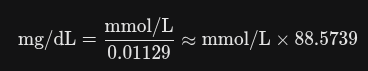

In [ ]:
# REscate de datos usando trigliceridos_2
df_train['trigliceridos'] = df_train['trigliceridos'].fillna(df_train['trigliceridos_2'] * 88.57)
df_test['trigliceridos'] = df_test['trigliceridos'].fillna(df_test['trigliceridos_2'] * 88.57)

In [ ]:
# # 1. Antes del rescate, veamos cuántos nulos tenemos
# nulos_trig_antes = df['trigliceridos'].isnull().sum()

# # 2. Rescatamos: Si trigliceridos es nulo, lo llenamos con (trigliceridos_2 * 88.57)
# # Usamos 88.57 que es el factor estándar de conversión para triglicéridos
# df['trigliceridos'] = df['trigliceridos'].fillna(df['trigliceridos_2'] * 88.57)

# # 3. Verificamos el impacto
# nulos_trig_despues = df['trigliceridos'].isnull().sum()
# print(f"Nulos en trigliceridos ANTES: {nulos_trig_antes}")
# print(f"Nulos en trigliceridos DESPUÉS: {nulos_trig_despues}")
# print(f"¡Rescatamos {nulos_trig_antes - nulos_trig_despues} registros!")

comparativa de métodos de imputación

In [ ]:
df['trigliceridos'] = df['trigliceridos'].fillna(df['trigliceridos_2'] * 88.57)

# 1. Preparar datos
df_mediana = df.copy()
df_knn = df.copy()

# 2. Imputar con Mediana
df_mediana['trigliceridos'] = df_mediana['trigliceridos'].fillna(df_mediana['trigliceridos'].median())

# 3. Imputar con KNN
from sklearn.impute import KNNImputer
cols_para_knn = ['edad', 'genero', 'bmi', 'diabetes', 'trigliceridos']
imputer = KNNImputer(n_neighbors=5)
df_knn[cols_para_knn] = imputer.fit_transform(df_knn[cols_para_knn])

# 4. Comparativa Final
print("--- COMPARATIVA DE MÉTODOS ---")
print(f"ORIGINAL (con nulos)  | Media: {df['trigliceridos'].mean():.2f} | Std: {df['trigliceridos'].std():.2f}")
print(f"MÉTODO MEDIANA        | Media: {df_mediana['trigliceridos'].mean():.2f} | Std: {df_mediana['trigliceridos'].std():.2f}")
print(f"MÉTODO KNN            | Media: {df_knn['trigliceridos'].mean():.2f} | Std: {df_knn['trigliceridos'].std():.2f}")

--- COMPARATIVA DE MÉTODOS ---
ORIGINAL (con nulos)  | Media: 137.85 | Std: 113.67
MÉTODO MEDIANA        | Media: 134.63 | Std: 107.26
MÉTODO KNN            | Media: 137.33 | Std: 108.42


kNN es la mejor opcion para imputar el 11,57% restante

In [ ]:
# Imputación
cols_for_trig_knn = ['edad', 'genero', 'bmi', 'diabetes', 'trigliceridos']
imputer_trig = KNNImputer(n_neighbors=5)

df_train[cols_for_trig_knn] = imputer_trig.fit_transform(df_train[cols_for_trig_knn])
df_test[cols_for_trig_knn] = imputer_trig.transform(df_test[cols_for_trig_knn])

df_train.drop(columns=['trigliceridos_2'], inplace=True, errors='ignore')
df_test.drop(columns=['trigliceridos_2'], inplace=True, errors='ignore')

print("Triglycerides imputation complete.")
print(f"Missing trigliceridos in df_train: {df_train['trigliceridos'].isnull().sum()}")
print(f"Missing trigliceridos in df_test: {df_test['trigliceridos'].isnull().sum()}")

Triglycerides imputation complete.
Missing trigliceridos in df_train: 0
Missing trigliceridos in df_test: 0


In [ ]:
# # Eliminamos triglicéridos en mmol/L
# df.drop(columns=['trigliceridos_2'], inplace=True, errors='ignore')

###**HDL**

In [ ]:
# 1. Comparamos los nulos de ambas columnas de HDL
print(f"Faltantes en HDL (hdl - mg/dL): {df['hdl'].isnull().sum()}")
print(f"Faltantes en HDL_2 (hdl_2 - mmol/L): {df['hdl_2'].isnull().sum()}")

# 2. Verificamos si hay casos donde hdl_2 puede 'salvar' a hdl
casos_recuperables_hdl = df[df['hdl'].isnull() & df['hdl_2'].notnull()].shape[0]
print(f"Casos donde hdl_2 podría 'salvar' a hdl: {casos_recuperables_hdl}")

Faltantes en HDL (hdl - mg/dL): 632
Faltantes en HDL_2 (hdl_2 - mmol/L): 632
Casos donde hdl_2 podría 'salvar' a hdl: 0


In [ ]:
# 1. Guardamos stats actuales
stats_hdl_antes = {
    'media': df['hdl'].mean(),
    'std': df['hdl'].std()
}

# Incluimos género y bmi porque son los mejores predictores del hdl
cols_hdl_knn = ['genero', 'bmi', 'edad', 'hdl']
imputer_hdl = KNNImputer(n_neighbors=5)

# 3. Comparativa (en un df temporal)
df_hdl_knn = df.copy()
df_hdl_knn[cols_hdl_knn] = imputer_hdl.fit_transform(df_hdl_knn[cols_hdl_knn])

# 4. Resultados
print("--- AUDITORÍA DE IMPUTACIÓN HDL ---")
print(f"ORIGINAL | Media: {stats_hdl_antes['media']:.2f} | Std: {stats_hdl_antes['std']:.2f}")
print(f"POST KNN | Media: {df_hdl_knn['hdl'].mean():.2f} | Std: {df_hdl_knn['hdl'].std():.2f}")

--- AUDITORÍA DE IMPUTACIÓN HDL ---
ORIGINAL | Media: 53.26 | Std: 15.68
POST KNN | Media: 53.33 | Std: 15.13


Imputación con KNN

In [ ]:
# # 1. Aplicamos el KNN definitivo
# from sklearn.impute import KNNImputer
# cols_hdl_knn = ['genero', 'bmi', 'edad', 'hdl']
# imputer_hdl = KNNImputer(n_neighbors=5)
# df[cols_hdl_knn] = imputer_hdl.fit_transform(df[cols_hdl_knn])

# # 2. Eliminamos la columna HDL_2
# df.drop(columns=['hdl_2'], inplace=True, errors='ignore')

In [ ]:
cols_for_hdl_knn = ['genero', 'bmi', 'edad', 'hdl']
imputer_hdl = KNNImputer(n_neighbors=5)

df_train[cols_for_hdl_knn] = imputer_hdl.fit_transform(df_train[cols_for_hdl_knn])
df_test[cols_for_hdl_knn] = imputer_hdl.transform(df_test[cols_for_hdl_knn])

df_train.drop(columns=['hdl_2'], inplace=True, errors='ignore')
df_test.drop(columns=['hdl_2'], inplace=True, errors='ignore')

print("HDL imputation complete.")
print(f"Missing hdl in df_train: {df_train['hdl'].isnull().sum()}")
print(f"Missing hdl in df_test: {df_test['hdl'].isnull().sum()}")

HDL imputation complete.
Missing hdl in df_train: 0
Missing hdl in df_test: 0


###**COLESTEROL TOTAL**

Verificamos si podemos recuperar algo

In [ ]:
# Rescue values using colesterol_total_2
df_train.loc[df_train['colesterol_total'].isnull() & df_train['colesterol_total_2'].notnull(), 'colesterol_total'] = \
    df_train.loc[df_train['colesterol_total'].isnull() & df_train['colesterol_total_2'].notnull(), 'colesterol_total_2'] / 0.02586
df_test.loc[df_test['colesterol_total'].isnull() & df_test['colesterol_total_2'].notnull(), 'colesterol_total'] = \
    df_test.loc[df_test['colesterol_total'].isnull() & df_test['colesterol_total_2'].notnull(), 'colesterol_total_2'] / 0.02586



In [ ]:
# # 1. Verificamos si hay rescate posible
# casos_recuperables_col = df[df['colesterol_total'].isnull() & df['colesterol_total_2'].notnull()].shape[0]

# # 2. Rescatamos (si existen casos) y luego eliminamos la columna auxiliar
# if casos_recuperables_col > 0:
#     df['colesterol_total'] = df['colesterol_total'].fillna(df['colesterol_total_2'] / 0.02586)
#     print(f"¡Se rescataron {casos_recuperables_col} registros de Colesterol Total!")
# else:
#     print("No hubo casos para rescatar mediante conversión (los nulos coinciden).")

# # Eliminamos la columna _2 para mantener el df limpio
# df.drop(columns=['colesterol_total_2'], inplace=True, errors='ignore')

In [ ]:
# Verificamos si hay rescate posible
casos_recuperables_col = df[df['colesterol_total'].isnull() & df['colesterol_total_2'].notnull()].shape[0]

# Rescatamos (si existen casos) y luego eliminamos la columna auxiliar
if casos_recuperables_col > 0:
    df['colesterol_total'] = df['colesterol_total'].fillna(df['colesterol_total_2'] / 0.02586)
    print(f"¡Se rescataron {casos_recuperables_col} registros de Colesterol Total!")
else:
    print("No hubo casos para rescatar mediante conversión (los nulos coinciden).")

# Guardamos el estado original (antes de imputar)
media_antes = df['colesterol_total'].mean()
std_antes = df['colesterol_total'].std()

# Aplicamos la imputación KNN
from sklearn.impute import KNNImputer
cols_col_knn = ['edad', 'genero', 'bmi', 'diabetes', 'colesterol_total']
imputer_col = KNNImputer(n_neighbors=5)
df[cols_col_knn] = imputer_col.fit_transform(df[cols_col_knn])

# 3. Calculamos el estado final
media_despues = df['colesterol_total'].mean()
std_despues = df['colesterol_total'].std()

# 4. Reporte de impacto
print("--- IMPACTO DE IMPUTACIÓN (COLESTEROL TOTAL) ---")
print(f"MEDIA:    Antes {media_antes:.2f} -> Después {media_despues:.2f} (Cambio: {((media_despues - media_antes)/media_antes)*100:.4f}%)")
print(f"DESV.EST: Antes {std_antes:.2f} -> Después {std_despues:.2f} (Cambio: {((std_despues - std_antes)/std_antes)*100:.4f}%)")
print(f"Nulos restantes: {df['colesterol_total'].isnull().sum()}")

No hubo casos para rescatar mediante conversión (los nulos coinciden).
--- IMPACTO DE IMPUTACIÓN (COLESTEROL TOTAL) ---
MEDIA:    Antes 188.08 -> Después 187.96 (Cambio: -0.0609%)
DESV.EST: Antes 41.29 -> Después 39.48 (Cambio: -4.3801%)
Nulos restantes: 0


In [ ]:
# Impute using KNN
cols_for_chol_knn = ['edad', 'genero', 'bmi', 'diabetes', 'colesterol_total']
imputer_chol = KNNImputer(n_neighbors=5)

# Fit on df_train and transform both
df_train[cols_for_chol_knn] = imputer_chol.fit_transform(df_train[cols_for_chol_knn])
df_test[cols_for_chol_knn] = imputer_chol.transform(df_test[cols_for_chol_knn])

# Remove 'colesterol_total_2'
df_train.drop(columns=['colesterol_total_2'], inplace=True, errors='ignore')
df_test.drop(columns=['colesterol_total_2'], inplace=True, errors='ignore')

print("Colesterol Total imputation complete.")
print(f"Missing colesterol_total in df_train: {df_train['colesterol_total'].isnull().sum()}")
print(f"Missing colesterol_total in df_test: {df_test['colesterol_total'].isnull().sum()}")

Colesterol Total imputation complete.
Missing colesterol_total in df_train: 0
Missing colesterol_total in df_test: 0


In [ ]:
# # Eliminamos la columna de unidades internacionales de Colesterol Total
# df.drop(columns=['colesterol_total_2'], inplace=True, errors='ignore')


###**LDL**

Como ya enemos los valores de colesterol total, hdl y trigliceridos, podemos calcular hdl usando la siguiente formula:
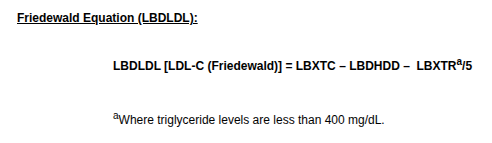

In [ ]:
# # 1. Función basada estrictamente en la documentación de NHANES
# def rescatar_ldl_friedewald(row):
#     # Si el LDL es nulo, aplicamos la fórmula oficial
#     if pd.isnull(row['ldl']):
#         # Verificamos la restricción técnica de Friedewald (TG < 400 mg/dL)
#         if row['trigliceridos'] < 400:
#             # Fórmula: Total - HDL - (TG / 5)
#             return row['colesterol_total'] - row['hdl'] - (row['trigliceridos'] / 5)
#     return row['ldl']

# # 2. Aplicamos el rescate
# nulos_antes = df['ldl'].isnull().sum()
# df['ldl'] = df.apply(rescatar_ldl_friedewald, axis=1)
# nulos_despues = df['ldl'].isnull().sum()

# # 3. Limpieza de columnas sobrantes
# df.drop(columns=['ldl_2'], inplace=True, errors='ignore')

# print("--- RESULTADO DEL RESCATE SEGÚN DOCUMENTACIÓN ---")
# print(f"Nulos iniciales en LDL: {nulos_antes}")
# print(f"Nulos después de aplicar Friedewald: {nulos_despues}")
# print(f"¡Logramos rescatar {nulos_antes - nulos_despues} pacientes!")

Restante con KNN

In [ ]:
# 1. Definión función para cálculo Friedewald formula for rescue
def rescatar_ldl_friedewald(row):
    # Only calculate if 'ldl' is null and Friedewald conditions are met
    if pd.isnull(row['ldl']):
        if row['trigliceridos'] < 400:
            return row['colesterol_total'] - row['hdl'] - (row['trigliceridos'] / 5)
    return row['ldl']

# Se aplica Friedewald para rescatar df_train y df_test
df_train['ldl'] = df_train.apply(rescatar_ldl_friedewald, axis=1)
df_test['ldl'] = df_test.apply(rescatar_ldl_friedewald, axis=1)

# Imputación con KNN
cols_for_ldl_knn = ['edad', 'genero', 'bmi', 'diabetes', 'trigliceridos', 'hdl', 'colesterol_total', 'ldl']
imputer_ldl = KNNImputer(n_neighbors=5)


df_train[cols_for_ldl_knn] = imputer_ldl.fit_transform(df_train[cols_for_ldl_knn])
df_test[cols_for_ldl_knn] = imputer_ldl.transform(df_test[cols_for_ldl_knn])

df_train.drop(columns=['ldl_2'], inplace=True, errors='ignore')
df_test.drop(columns=['ldl_2'], inplace=True, errors='ignore')

print("LDL imputation complete.")
print(f"Missing ldl in df_train: {df_train['ldl'].isnull().sum()}")
print(f"Missing ldl in df_test: {df_test['ldl'].isnull().sum()}")

LDL imputation complete.
Missing ldl in df_train: 0
Missing ldl in df_test: 0


In [ ]:
# # 1. Definimos las columnas para el cierre final de lípidos
# cols_ldl_knn = ['edad', 'genero', 'bmi', 'diabetes', 'trigliceridos', 'hdl', 'colesterol_total', 'ldl']

# # 2. Aplicamos el KNN final
# imputer_ldl = KNNImputer(n_neighbors=5)
# df[cols_ldl_knn] = imputer_ldl.fit_transform(df[cols_ldl_knn])

# print(f"--- CIERRE FINAL DE LÍPIDOS ---")
# print(f"Nulos restantes en LDL: {df['ldl'].isnull().sum()}")
# print(f"Dataset de lípidos completado al 100%.")

### **GLUCOSA (a revisar)**

--- ANÁLISIS DE CORRELACIÓN ---
Correlación entre glucosa (mg/dL) y glucosa_2 (mmol/L): 1.0000


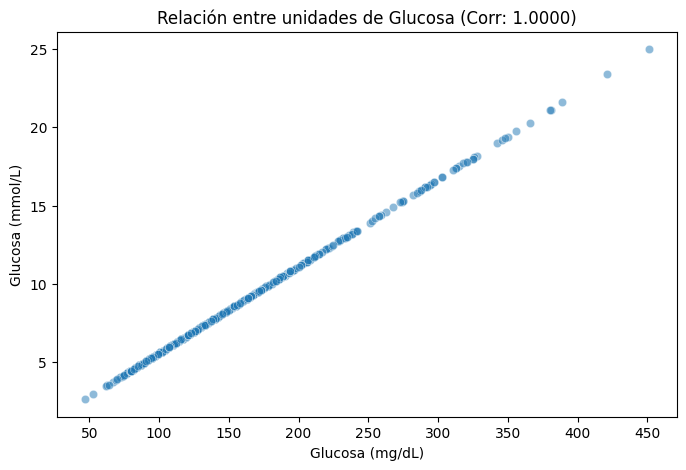

In [ ]:
# Calculamos la correlación de Pearson entre ambas glucosas
correlacion = df[['glucosa', 'glucosa_2']].corr().iloc[0, 1]

print(f"--- ANÁLISIS DE CORRELACIÓN ---")
print(f"Correlación entre glucosa (mg/dL) y glucosa_2 (mmol/L): {correlacion:.4f}")

# Visualización rápida para confirmar linealidad
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='glucosa', y='glucosa_2', alpha=0.5)
plt.title(f'Relación entre unidades de Glucosa (Corr: {correlacion:.4f})')
plt.xlabel('Glucosa (mg/dL)')
plt.ylabel('Glucosa (mmol/L)')
plt.show()

In [ ]:
# Factor de conversión Roche cobas c systems
FACTOR_ROCHE = 18.02

# Solo llenamos si 'glucosa' es nulo y 'glucosa_2' tiene datos
df['glucosa'] = df['glucosa'].fillna(df['glucosa_2'] * FACTOR_ROCHE)

# Eliminamos la columna espejo para no confundir al modelo con dos variables idénticas
df.drop(columns=['glucosa_2'], inplace=True, errors='ignore')

print(f"Nulos en glucosa tras consolidación: {df['glucosa'].isnull().sum()}")

Nulos en glucosa tras consolidación: 3133


In [ ]:
FACTOR_ROCHE = 18.02

df_train['glucosa'] = df_train['glucosa'].fillna(df_train['glucosa_2'] * FACTOR_ROCHE)
df_test['glucosa'] = df_test['glucosa'].fillna(df_test['glucosa_2'] * FACTOR_ROCHE)

df_train.drop(columns=['glucosa_2'], inplace=True, errors='ignore')
df_test.drop(columns=['glucosa_2'], inplace=True, errors='ignore')

print("Glucosa consolidation complete.")
print(f"Missing glucosa in df_train: {df_train['glucosa'].isnull().sum()}")
print(f"Missing glucosa in df_test: {df_test['glucosa'].isnull().sum()}")

Glucosa consolidation complete.
Missing glucosa in df_train: 2471
Missing glucosa in df_test: 662


NO se pudieron rescdartar muchos datos. El faltante es grande. Se usará en su lugar Glicohemoglobinan que  es una proteína presente en glóbulos rojos que tiene azúcar pegada

In [ ]:
# # 1. Seleccionamos variables relacionadas con el azúcar a largo plazo
# cols_glico = ['edad', 'bmi', 'diabetes', 'glicohemoglobina']

# # 2. Aplicamos KNN (5 vecinos)
# imputer_glico = KNNImputer(n_neighbors=5)
# df[cols_glico] = imputer_glico.fit_transform(df[cols_glico])

# print("--- CIERRE DE GLICOHEMOGLOBINA ---")
# print(f"Nulos restantes: {df['glicohemoglobina'].isnull().sum()}")
# print(f"Media de la población: {df['glicohemoglobina'].mean():.2f}%")

In [ ]:
cols_for_glico_knn = ['edad', 'bmi', 'diabetes', 'glicohemoglobina']
imputer_glico = KNNImputer(n_neighbors=5)

df_train[cols_for_glico_knn] = imputer_glico.fit_transform(df_train[cols_for_glico_knn])
df_test[cols_for_glico_knn] = imputer_glico.transform(df_test[cols_for_glico_knn])

print("Glicohemoglobina imputation complete.")
print(f"Missing glicohemoglobina in df_train: {df_train['glicohemoglobina'].isnull().sum()}")
print(f"Missing glicohemoglobina in df_test: {df_test['glicohemoglobina'].isnull().sum()}")

Glicohemoglobina imputation complete.
Missing glicohemoglobina in df_train: 0
Missing glicohemoglobina in df_test: 0


### **HEMOGLOBINA**

In [ ]:
# 1. Verificamos nulos iniciales
nulos_hemo = df['hemoglobina'].isnull().sum()
print(f"Nulos iniciales en Hemoglobina: {nulos_hemo}")

# 2. Imputación KNN
# Incluimos genero y edad porque la hemoglobina depende directamente de ellos
cols_hemo = ['genero', 'edad', 'hemoglobina']
imputer_hemo = KNNImputer(n_neighbors=5)

df[cols_hemo] = imputer_hemo.fit_transform(df[cols_hemo])

# 3. Reporte
print(f"--- CIERRE DE HEMOGLOBINA ---")
print(f"Nulos finales: {df['hemoglobina'].isnull().sum()}")
print(f"Rango de valores: {df['hemoglobina'].min():.1f} - {df['hemoglobina'].max():.1f} g/dL")

Nulos iniciales en Hemoglobina: 541
--- CIERRE DE HEMOGLOBINA ---
Nulos finales: 0
Rango de valores: 6.4 - 19.9 g/dL


In [ ]:
cols_for_hemo_knn = ['genero', 'edad', 'hemoglobina']
imputer_hemo = KNNImputer(n_neighbors=5)

df_train[cols_for_hemo_knn] = imputer_hemo.fit_transform(df_train[cols_for_hemo_knn])
df_test[cols_for_hemo_knn] = imputer_hemo.transform(df_test[cols_for_hemo_knn])

print("Hemoglobina imputation complete.")
print(f"Missing hemoglobina in df_train: {df_train['hemoglobina'].isnull().sum()}")
print(f"Missing hemoglobina in df_test: {df_test['hemoglobina'].isnull().sum()}")

Hemoglobina imputation complete.
Missing hemoglobina in df_train: 0
Missing hemoglobina in df_test: 0


### **PROTEINA C**

In [ ]:
# # 1. Variables que explican la Proteína C (Inflamación)
# # El BMI es fundamental aquí.
# cols_pc = ['bmi', 'edad', 'proteina_c']

# imputer_pc = KNNImputer(n_neighbors=5)

# # Aplicamos
# df[cols_pc] = imputer_pc.fit_transform(df[cols_pc])

# print(f"--- CIERRE DE PROTEINA_C ---")
# print(f"Nulos finales: {df['proteina_c'].isnull().sum()}")
# print(f"Media resultante: {df['proteina_c'].mean():.2f} mg/L")

In [ ]:
cols_for_pc_knn = ['bmi', 'edad', 'proteina_c']
imputer_pc = KNNImputer(n_neighbors=5)

df_train[cols_for_pc_knn] = imputer_pc.fit_transform(df_train[cols_for_pc_knn])
df_test[cols_for_pc_knn] = imputer_pc.transform(df_test[cols_for_pc_knn])

print("Proteina C imputation complete.")
print(f"Missing proteina_c in df_train: {df_train['proteina_c'].isnull().sum()}")
print(f"Missing proteina_c in df_test: {df_test['proteina_c'].isnull().sum()}")

Proteina C imputation complete.
Missing proteina_c in df_train: 0
Missing proteina_c in df_test: 0


### **CREATININA**

In [ ]:
# # 1. Variables predictoras: Género, Edad y BMI (reflejo indirecto de masa corporal)
# cols_creat = ['genero', 'edad', 'bmi', 'creatinina']

# # 2. Configurar e imputar
# imputer_creat = KNNImputer(n_neighbors=5)
# df[cols_creat] = imputer_creat.fit_transform(df[cols_creat])

# print(f"--- REPORTE CREATININA ---")
# print(f"Nulos finales: {df['creatinina'].isnull().sum()}")
# print(f"Rango: {df['creatinina'].min():.2f} - {df['creatinina'].max():.2f} mg/dL")

In [ ]:
cols_for_creat_knn = ['genero', 'edad', 'bmi', 'creatinina']
imputer_creat = KNNImputer(n_neighbors=5)

df_train[cols_for_creat_knn] = imputer_creat.fit_transform(df_train[cols_for_creat_knn])
df_test[cols_for_creat_knn] = imputer_creat.transform(df_test[cols_for_creat_knn])

print("Creatinina imputation complete.")
print(f"Missing creatinina in df_train: {df_train['creatinina'].isnull().sum()}")
print(f"Missing creatinina in df_test: {df_test['creatinina'].isnull().sum()}")

Creatinina imputation complete.
Missing creatinina in df_train: 0
Missing creatinina in df_test: 0


### **HORAS DE SUEÑO**

In [ ]:
# Revisamos los valores únicos y la frecuencia
print("Distribución de horas de sueño:")
print(df['horas_suenio'].value_counts().sort_index())

# Vemos la mediana general
print(f"\nMediana general: {df['horas_suenio'].median()}")

Distribución de horas de sueño:
horas_suenio
2.0       27
3.0       34
3.5       23
4.0      102
4.5       49
5.0      214
5.5      123
6.0      475
6.5      346
7.0      912
7.5      500
8.0     1054
8.5      366
9.0      652
9.5      157
10.0     227
10.5      61
11.0     106
11.5      16
12.0      41
12.5       5
13.0      19
13.5       1
14.0      12
Name: count, dtype: int64

Mediana general: 7.5


In [ ]:
# # Imputación
# mediana_suenio = df['horas_suenio'].median()
# df['horas_suenio'] = df['horas_suenio'].fillna(mediana_suenio)

# print(f"Se imputaron los nulos con el valor: {mediana_suenio} horas")
# print(f"Nulos restantes: {df['horas_suenio'].isnull().sum()}")

In [ ]:
median_horas_suenio_train = df_train['horas_suenio'].median()
df_train['horas_suenio'] = df_train['horas_suenio'].fillna(median_horas_suenio_train)
df_test['horas_suenio'] = df_test['horas_suenio'].fillna(median_horas_suenio_train)

print("Horas Suenio imputation complete.")
print(f"Missing horas_suenio in df_train: {df_train['horas_suenio'].isnull().sum()}")
print(f"Missing horas_suenio in df_test: {df_test['horas_suenio'].isnull().sum()}")

Horas Suenio imputation complete.
Missing horas_suenio in df_train: 0
Missing horas_suenio in df_test: 0


### **ANCHO DE DISTRIBUCIÓN DE GLÓBULOS ROJOS**

In [ ]:
# # Usamos las variables sanguíneas que ya tenemos completas para predecir el RDW
# cols_rdw = ['hemoglobina', 'proteina_c', 'ancho_distribucion_globulos']

# imputer_rdw = KNNImputer(n_neighbors=5)
# df[cols_rdw] = imputer_rdw.fit_transform(df[cols_rdw])

# print("--- CIERRE DE RDW ---")
# print(f"Nulos restantes: {df['ancho_distribucion_globulos'].isnull().sum()}")

In [ ]:
cols_for_rdw_knn = ['hemoglobina', 'proteina_c', 'ancho_distribucion_globulos']
imputer_rdw = KNNImputer(n_neighbors=5)

df_train[cols_for_rdw_knn] = imputer_rdw.fit_transform(df_train[cols_for_rdw_knn])
df_test[cols_for_rdw_knn] = imputer_rdw.transform(df_test[cols_for_rdw_knn])

print("Ancho Distribucion Globulos imputation complete.")
print(f"Missing ancho_distribucion_globulos in df_train: {df_train['ancho_distribucion_globulos'].isnull().sum()}")
print(f"Missing ancho_distribucion_globulos in df_test: {df_test['ancho_distribucion_globulos'].isnull().sum()}")

Ancho Distribucion Globulos imputation complete.
Missing ancho_distribucion_globulos in df_train: 0
Missing ancho_distribucion_globulos in df_test: 0


### **consumo_alcohol_ultimo_año**

In [ ]:
print(df['consumo_alcohol_ultimo_año'].value_counts().sort_index())

consumo_alcohol_ultimo_año
0.0     1034
1.0      142
2.0      154
3.0      270
4.0      317
5.0      331
6.0      568
7.0      333
8.0      281
9.0      444
10.0     496
99.0       2
Name: count, dtype: int64


In [ ]:
# Ver qué valores existen
print("Distribución original de consumo_alcohol:")
print(df['consumo_alcohol_ultimo_año'].value_counts().sort_index())

Distribución original de consumo_alcohol:
consumo_alcohol_ultimo_año
0.0     1034
1.0      142
2.0      154
3.0      270
4.0      317
5.0      331
6.0      568
7.0      333
8.0      281
9.0      444
10.0     496
99.0       2
Name: count, dtype: int64


In [ ]:
# 1. Ver el cruce de las dos variables incluyendo los nulos (NaN)
print("--- MATRIZ DE CONSISTENCIA DE ALCOHOL ---")
print(pd.crosstab(df['bebio_alguna_vez'], df['consumo_alcohol_ultimo_año'], dropna=False))

# 2. Calcular cuántos nulos en 'bebio_alguna_vez' tienen datos de consumo
rescatables = df[df['bebio_alguna_vez'].isnull() & df['consumo_alcohol_ultimo_año'].notnull()].shape[0]

print(f"\nCasos donde 'bebio_alguna_vez' es nulo pero SÍ hay frecuencia de consumo: {rescatables}")

--- MATRIZ DE CONSISTENCIA DE ALCOHOL ---
consumo_alcohol_ultimo_año  0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   \
bebio_alguna_vez                                                             
1.0                         1034   142   154   270   317   331   568   333   
2.0                            0     0     0     0     0     0     0     0   
NaN                            0     0     0     0     0     0     0     0   

consumo_alcohol_ultimo_año  8.0   9.0   10.0  99.0  NaN   
bebio_alguna_vez                                          
1.0                          281   444   496     2     2  
2.0                            0     0     0     0   509  
NaN                            0     0     0     0   685  

Casos donde 'bebio_alguna_vez' es nulo pero SÍ hay frecuencia de consumo: 0


Primero a los que respondieron en bebio_alguna_vez con 2 (nunca), se les asigna en consumo_alcohol_ultimo_año = 0 (no bebió nunca en el último año)

In [ ]:
# # Asignamos frecuencia 0 a los que respondieron que NO bebieron nunca
# df.loc[df['bebio_alguna_vez'] == 2.0, 'consumo_alcohol_ultimo_año'] = 0.0

# # Verificamos cómo quedó la columna ahora
# print("Nueva distribución de consumo_alcohol_ultimo_año:")
# print(df['consumo_alcohol_ultimo_año'].value_counts(dropna=False).sort_index())

# # Contamos cuántos nulos (NaN) sobreviven
# nulos_finales = df['consumo_alcohol_ultimo_año'].isnull().sum()
# print(f"\nFaltantes restantes después de la lógica: {nulos_finales}")

In [ ]:
# 14. Handle Consumo Alcohol Ultimo Año
# Asigno 0.0 donde 'bebio_alguna_vez' is 2.0
df_train.loc[df_train['bebio_alguna_vez'] == 2.0, 'consumo_alcohol_ultimo_año'] = 0.0
df_test.loc[df_test['bebio_alguna_vez'] == 2.0, 'consumo_alcohol_ultimo_año'] = 0.0

# Limpiar 77/99
# df_train['consumo_alcohol_ultimo_año'] = df_train['consumo_alcohol_ultimo_año'].replace({77.0: np.nan, 99.0: np.nan})
# df_test['consumo_alcohol_ultimo_año'] = df_test['consumo_alcohol_ultimo_año'].replace({77.0: np.nan, 99.0: np.nan})

Comparativa de imputación con mediana y con knn

In [ ]:
# 1. Preparar datos: Limpiar 77/99 y crear copias para comparar
df_temp = df.copy()
df_temp['consumo_alcohol_ultimo_año'] = df_temp['consumo_alcohol_ultimo_año'].replace({77.0: np.nan, 99.0: np.nan})

# --- OPCIÓN A: MEDIANA ---
serie_mediana = df_temp['consumo_alcohol_ultimo_año'].fillna(df_temp['consumo_alcohol_ultimo_año'].median())

# --- OPCIÓN B: KNN ---
imputer = KNNImputer(n_neighbors=5)
# Usamos edad y genero (asegúrate de que genero sea numérico) para el KNN
columnas_knn = ['genero', 'edad', 'consumo_alcohol_ultimo_año']
df_knn = pd.DataFrame(imputer.fit_transform(df_temp[columnas_knn]), columns=columnas_knn)
serie_knn = df_knn['consumo_alcohol_ultimo_año'].round()

# 2. COMPARATIVA
comparativa = pd.DataFrame({
    'Original (con nulos)': df_temp['consumo_alcohol_ultimo_año'].describe(),
    'Imputación Mediana': serie_mediana.describe(),
    'Imputación KNN': serie_knn.describe()
})

print("--- COMPARATIVA DE ESTADÍSTICAS ---")
print(comparativa)

print("\n--- DIFERENCIA EN DISTRIBUCIÓN (Conteos) ---")
print("Mediana:\n", serie_mediana.value_counts().head(3))
print("\nKNN:\n", serie_knn.value_counts().head(3))

--- COMPARATIVA DE ESTADÍSTICAS ---
       Original (con nulos)  Imputación Mediana  Imputación KNN
count           4370.000000         5568.000000     5568.000000
mean               4.834325            4.869971        4.893858
std                3.538949            3.135863        3.243162
min                0.000000            0.000000        0.000000
25%                1.000000            3.000000        3.000000
50%                5.000000            5.000000        5.000000
75%                8.000000            7.000000        7.000000
max               10.000000           10.000000       10.000000

--- DIFERENCIA EN DISTRIBUCIÓN (Conteos) ---
Mediana:
 consumo_alcohol_ultimo_año
5.0    1529
0.0    1034
6.0     568
Name: count, dtype: int64

KNN:
 consumo_alcohol_ultimo_año
0.0    1042
6.0     789
5.0     566
Name: count, dtype: int64


In [ ]:
# # 1. Limpieza de códigos de error antes de imputar
# df['consumo_alcohol_ultimo_año'] = df['consumo_alcohol_ultimo_año'].replace({77.0: np.nan, 99.0: np.nan})

# # 2. Configuramos el KNNImputer
# # Usamos género y edad como variables de contexto para "predecir" el alcohol
# imputer_alc = KNNImputer(n_neighbors=5)
# cols_alc = ['genero', 'edad', 'bmi', 'consumo_alcohol_ultimo_año']

# # 3. Aplicamos la imputación
# df[cols_alc] = imputer_alc.fit_transform(df[cols_alc])

# # 4. Redondeamos el resultado para mantener la escala original (0 a 10)
# df['consumo_alcohol_ultimo_año'] = df['consumo_alcohol_ultimo_año'].round()

# print("--- CIERRE DE VARIABLE: ALCOHOL ---")
# print(f"Nulos finales: {df['consumo_alcohol_ultimo_año'].isnull().sum()}")
# print(f"Media final: {df['consumo_alcohol_ultimo_año'].mean():.2f}")

In [ ]:

cols_for_alc_knn = ['genero', 'edad', 'bmi', 'consumo_alcohol_ultimo_año']
imputer_alc = KNNImputer(n_neighbors=5)

df_train[cols_for_alc_knn] = imputer_alc.fit_transform(df_train[cols_for_alc_knn])
df_test[cols_for_alc_knn] = imputer_alc.transform(df_test[cols_for_alc_knn])

df_train['consumo_alcohol_ultimo_año'] = df_train['consumo_alcohol_ultimo_año'].round()
df_test['consumo_alcohol_ultimo_año'] = df_test['consumo_alcohol_ultimo_año'].round()

print("Consumo Alcohol Ultimo Año imputation complete.")
print(f"Missing consumo_alcohol_ultimo_año in df_train: {df_train['consumo_alcohol_ultimo_año'].isnull().sum()}")
print(f"Missing consumo_alcohol_ultimo_año in df_test: {df_test['consumo_alcohol_ultimo_año'].isnull().sum()}")

Consumo Alcohol Ultimo Año imputation complete.
Missing consumo_alcohol_ultimo_año in df_train: 0
Missing consumo_alcohol_ultimo_año in df_test: 0


### **consumo_excesivo_alcohol_ultimo_año**

A los que respondieron que no bebieron nunca en el último año se les asigna 0

In [ ]:
# # Si en la frecuencia del último año es 0.0 (Nunca),
# # entonces el consumo excesivo también es 0.0
# df.loc[df['consumo_alcohol_ultimo_año'] == 0.0, 'consumo_excesivo_alcohol_ultimo_año'] = 0.0

# print("Faltantes después de aplicar lógica de arrastre:")
# print(df['consumo_excesivo_alcohol_ultimo_año'].isnull().sum())

# # 1. Limpiar códigos de error (777, 999) si existieran
# df['consumo_excesivo_alcohol_ultimo_año'] = df['consumo_excesivo_alcohol_ultimo_año'].replace({777: np.nan, 999: np.nan, 77: np.nan, 99: np.nan})

# # 2. Configurar KNN usando la frecuencia de alcohol como apoyo clave
# imputer_binge = KNNImputer(n_neighbors=5)
# # Incluimos las variables que tienen relación lógica
# cols_binge = ['edad', 'genero', 'consumo_alcohol_ultimo_año', 'consumo_excesivo_alcohol_ultimo_año']

# # 3. Imputar
# df[cols_binge] = imputer_binge.fit_transform(df[cols_binge])

# # 4. Redondear (ya que hablamos de cantidad de días, no pueden ser decimales)
# df['consumo_excesivo_alcohol_ultimo_año'] = df['consumo_excesivo_alcohol_ultimo_año'].round()

# print(f"Nulos finales en consumo excesivo: {df['consumo_excesivo_alcohol_ultimo_año'].isnull().sum()}")

In [ ]:

# Se asigna 0.0 donde 'consumo_alcohol_ultimo_año' es 0.0
df_train.loc[df_train['consumo_alcohol_ultimo_año'] == 0.0, 'consumo_excesivo_alcohol_ultimo_año'] = 0.0
df_test.loc[df_test['consumo_alcohol_ultimo_año'] == 0.0, 'consumo_excesivo_alcohol_ultimo_año'] = 0.0

# df_train['consumo_excesivo_alcohol_ultimo_año'] = df_train['consumo_excesivo_alcohol_ultimo_año'].replace({777: np.nan, 999: np.nan, 77: np.nan, 99: np.nan})
# df_test['consumo_excesivo_alcohol_ultimo_año'] = df_test['consumo_excesivo_alcohol_ultimo_año'].replace({777: np.nan, 999: np.nan, 77: np.nan, 99: np.nan})

# Imputación
cols_for_binge_knn = ['edad', 'genero', 'consumo_alcohol_ultimo_año', 'consumo_excesivo_alcohol_ultimo_año']
imputer_binge = KNNImputer(n_neighbors=5)

df_train[cols_for_binge_knn] = imputer_binge.fit_transform(df_train[cols_for_binge_knn])
df_test[cols_for_binge_knn] = imputer_binge.transform(df_test[cols_for_binge_knn])

df_train['consumo_excesivo_alcohol_ultimo_año'] = df_train['consumo_excesivo_alcohol_ultimo_año'].round()
df_test['consumo_excesivo_alcohol_ultimo_año'] = df_test['consumo_excesivo_alcohol_ultimo_año'].round()

print("Consumo Excesivo Alcohol Ultimo Año imputation complete.")
print(f"Missing consumo_excesivo_alcohol_ultimo_año in df_train: {df_train['consumo_excesivo_alcohol_ultimo_año'].isnull().sum()}")
print(f"Missing consumo_excesivo_alcohol_ultimo_año in df_test: {df_test['consumo_excesivo_alcohol_ultimo_año'].isnull().sum()}")

Consumo Excesivo Alcohol Ultimo Año imputation complete.
Missing consumo_excesivo_alcohol_ultimo_año in df_train: 0
Missing consumo_excesivo_alcohol_ultimo_año in df_test: 0


### **deprimido_decaido**

In [ ]:
print(df['deprimido_decaido'].value_counts().sort_index())

deprimido_decaido
0.0    3673
1.0     793
2.0     212
3.0     164
9.0       4
Name: count, dtype: int64


In [ ]:
# 1. LIMPIEZA: Reemplazamos los códigos de error (7 y 9) en AMBOS datasets
# df_train['deprimido_decaido'] = df_train['deprimido_decaido'].replace({7: np.nan, 9: np.nan, 7.0: np.nan, 9.0: np.nan})
# df_test['deprimido_decaido'] = df_test['deprimido_decaido'].replace({7: np.nan, 9: np.nan, 7.0: np.nan, 9.0: np.nan})

# 2. DEFINICIÓN DE COLUMNAS: Variables para que el KNN "entienda" al paciente
# (Asegúrate de que 'edad', 'genero' y 'bmi' estén en tus dataframes)
cols_depre = ['edad', 'genero', 'bmi', 'deprimido_decaido']

# 3. CONFIGURACIÓN DEL IMPUTER
imputer_depre = KNNImputer(n_neighbors=5)

# 4. FIT & TRANSFORM en TRAIN
# Aquí el algoritmo aprende los patrones de deprimido_decaido basándose en edad/genero/bmi
df_train[cols_depre] = imputer_depre.fit_transform(df_train[cols_depre])

# 5. SOLO TRANSFORM en TEST
# Muy importante: Usamos las "reglas" aprendidas en Train para completar Test
df_test[cols_depre] = imputer_depre.transform(df_test[cols_depre])

# # 6. REDONDEO: Como la escala es 0, 1, 2, 3 (valores enteros)
# df_train['deprimido_decaido'] = df_train['deprimido_decaido'].round()
# df_test['deprimido_decaido'] = df_test['deprimido_decaido'].round()

print("Imputación de 'deprimido_decaido' finalizada en Train y Test.")
print(f"Nulos en Train: {df_train['deprimido_decaido'].isnull().sum()}")
print(f"Nulos en Test: {df_test['deprimido_decaido'].isnull().sum()}")

Imputación de 'deprimido_decaido' finalizada en Train y Test.
Nulos en Train: 0
Nulos en Test: 0


### **ANHEDONIA**

In [ ]:
# Análisis previo para df_train
print("--- ANÁLISIS DE ANHEDONIA (Train) ---")
conteo_train = df_train['anhedonia'].value_counts(dropna=False).sort_index()
print(conteo_train)

# Análisis previo para df_test
print("\n--- ANÁLISIS DE ANHEDONIA (Test) ---")
conteo_test = df_test['anhedonia'].value_counts(dropna=False).sort_index()
print(conteo_test)

# Cálculo de porcentajes de "basura" o nulos
total_nulos_err = df_train['anhedonia'].isin([7, 9, 7.0, 9.0]).sum() + df_train['anhedonia'].isnull().sum()
porcentaje = (total_nulos_err / len(df_train)) * 100
print(f"\nTotal de datos a imputar en Train (Nulos + Errores): {total_nulos_err} ({porcentaje:.2f}%)")

--- ANÁLISIS DE ANHEDONIA (Train) ---
anhedonia
0.0    2862
1.0     642
2.0     223
3.0     149
9.0       3
NaN     575
Name: count, dtype: int64

--- ANÁLISIS DE ANHEDONIA (Test) ---
anhedonia
0.0    749
1.0    132
2.0     42
3.0     43
9.0      1
NaN    147
Name: count, dtype: int64

Total de datos a imputar en Train (Nulos + Errores): 578 (12.98%)


In [ ]:
# 1. Limpiamos los códigos de error detectados (7 y 9) en AMBOS datasets
# df_train['anhedonia'] = df_train['anhedonia'].replace({7.0: np.nan, 9.0: np.nan})
# df_test['anhedonia'] = df_test['anhedonia'].replace({7.0: np.nan, 9.0: np.nan})

# 2. Preparamos las columnas para el KNN
# Nota: Usamos 'deprimido_decaido' porque ya la tenemos limpia e imputada,
# y es la que más información aporta sobre la anhedonia.
cols_anh = ['edad', 'genero', 'bmi', 'deprimido_decaido', 'anhedonia']

imputer_anh = KNNImputer(n_neighbors=5)

# 3. FIT y TRANSFORM en Train
df_train[cols_anh] = imputer_anh.fit_transform(df_train[cols_anh])

# 4. SOLO TRANSFORM en Test
df_test[cols_anh] = imputer_anh.transform(df_test[cols_anh])

# 5. Redondeo para mantener la escala original de 0 a 3
df_train['anhedonia'] = df_train['anhedonia'].round()
df_test['anhedonia'] = df_test['anhedonia'].round()

print("Imputación de anhedonia completada.")
print(f"Valores finales en Train:\n{df_train['anhedonia'].value_counts().sort_index()}")

Imputación de anhedonia completada.
Valores finales en Train:
anhedonia
0.0    3288
1.0     786
2.0     228
3.0     149
9.0       3
Name: count, dtype: int64


### **prediabetes_glucosa_alterada**

In [ ]:
# Análisis previo en Train y Test
print("--- ANÁLISIS DE PREDIABETES (Train) ---")
print(df_train['prediabetes_glucosa_alterada'].value_counts(dropna=False).sort_index())

print("\n--- ANÁLISIS DE PREDIABETES (Test) ---")
print(df_test['prediabetes_glucosa_alterada'].value_counts(dropna=False).sort_index())

--- ANÁLISIS DE PREDIABETES (Train) ---
prediabetes_glucosa_alterada
1.0     476
2.0    3121
9.0       5
NaN     852
Name: count, dtype: int64

--- ANÁLISIS DE PREDIABETES (Test) ---
prediabetes_glucosa_alterada
1.0     95
2.0    822
9.0      1
NaN    196
Name: count, dtype: int64


In [ ]:
# 1. Limpieza del código de error (9.0: No sabe)
# df_train['prediabetes_glucosa_alterada'] = df_train['prediabetes_glucosa_alterada'].replace({9.0: np.nan})
# df_test['prediabetes_glucosa_alterada'] = df_test['prediabetes_glucosa_alterada'].replace({9.0: np.nan})

# 2. Definimos las variables de apoyo
# Incluimos BMI y Edad porque son los "padres" de la glucosa alterada
cols_pre = ['edad', 'bmi', 'prediabetes_glucosa_alterada']

imputer_pre = KNNImputer(n_neighbors=5)

# 3. FIT y TRANSFORM en Train
df_train[cols_pre] = imputer_pre.fit_transform(df_train[cols_pre])

# 4. SOLO TRANSFORM en Test
df_test[cols_pre] = imputer_pre.transform(df_test[cols_pre])

# 5. Redondeo (Para volver a 1.0 o 2.0)
df_train['prediabetes_glucosa_alterada'] = df_train['prediabetes_glucosa_alterada'].round()
df_test['prediabetes_glucosa_alterada'] = df_test['prediabetes_glucosa_alterada'].round()

print("Imputación de prediabetes finalizada.")
print(f"Distribución final en Train:\n{df_train['prediabetes_glucosa_alterada'].value_counts()}")

Imputación de prediabetes finalizada.
Distribución final en Train:
prediabetes_glucosa_alterada
2.0    3911
1.0     535
9.0       5
3.0       3
Name: count, dtype: int64


### **FUMADOR ACTUAL**

In [ ]:
# Análisis previo en Train y Test
print("--- ANÁLISIS DE FUMADOR_ACTUAL (Train) ---")
print(df_train['fumador_actual'].value_counts(dropna=False).sort_index())

print("\n--- ANÁLISIS DE FUMADOR_ACTUAL (Test) ---")
print(df_test['fumador_actual'].value_counts(dropna=False).sort_index())

--- ANÁLISIS DE FUMADOR_ACTUAL (Train) ---
fumador_actual
1.0     624
2.0     165
3.0    1097
NaN    2568
Name: count, dtype: int64

--- ANÁLISIS DE FUMADOR_ACTUAL (Test) ---
fumador_actual
1.0    171
2.0     45
3.0    232
NaN    666
Name: count, dtype: int64


se revisa que si respondieron 2, no diga que sea fumador actual.

In [ ]:
# Creamos una tabla cruzada para ver cómo se relacionan
cruce_tabaco = pd.crosstab(
    df_train['fumo_100_cigarrillos'],
    df_train['fumador_actual'],
    dropna=False
)

print("--- TABLA DE CONSISTENCIA DE TABACO ---")
print(cruce_tabaco)

# Buscamos específicamente el "error": Gente que dijo NO (2.0) pero tiene un valor de fumador (1.0 o 2.0)
errores = df_train[(df_train['fumo_100_cigarrillos'] == 2.0) & (df_train['fumador_actual'].isin([1.0, 2.0]))]

if len(errores) > 0:
    print(f"\n¡Atención! Se encontraron {len(errores)} casos contradictorios.")
    print(errores[['fumo_100_cigarrillos', 'fumador_actual']].head())
else:
    print("\n¡Todo perfecto! No hay contradicciones: los que dijeron 'No' son todos No Fumadores (3.0).")

--- TABLA DE CONSISTENCIA DE TABACO ---
fumador_actual        1.0  2.0   3.0   NaN
fumo_100_cigarrillos                      
1.0                   624  165  1097     0
2.0                     0    0     0  2568

¡Todo perfecto! No hay contradicciones: los que dijeron 'No' son todos No Fumadores (3.0).


en NHANES la variable fumador_actual queda vacía para todos aquellos que respondieron "No" (2.0) a fumo_100_cigarrillos

In [ ]:
# Aplicamos la lógica: Si no fumó 100 cigarrillos, NO es fumador actual (3.0)
df_train.loc[(df_train['fumador_actual'].isnull()) & (df_train['fumo_100_cigarrillos'] == 2.0), 'fumador_actual'] = 3.0
df_test.loc[(df_test['fumador_actual'].isnull()) & (df_test['fumo_100_cigarrillos'] == 2.0), 'fumador_actual'] = 3.0

print(f"Nulos en Train después del rescate: {df_train['fumador_actual'].isnull().sum()}")

Nulos en Train después del rescate: 0


### **actividad_deportiva_moderada_x_semana**

In [ ]:
# Verificamos los valores únicos y su frecuencia para detectar los "intrusos"
print("Valores detectados en actividad_deportiva_moderada_x_semana:")
print(df['actividad_deportiva_moderada_x_semana'].value_counts().sort_index())

Valores detectados en actividad_deportiva_moderada_x_semana:
actividad_deportiva_moderada_x_semana
1.0     243
2.0     465
3.0     574
4.0     283
5.0     295
6.0      84
7.0     246
99.0      2
Name: count, dtype: int64


In [ ]:
# Análisis previo en Train y Test
print("--- ANÁLISIS DE ACTIVIDAD DEPORTIVA MODERADA (Train) ---")
print(df_train['actividad_deportiva_moderada_x_semana'].value_counts(dropna=False).sort_index())

print("\n--- ANÁLISIS DE ACTIVIDAD DEPORTIVA MODERADA (Test) ---")
print(df_test['actividad_deportiva_moderada_x_semana'].value_counts(dropna=False).sort_index())

--- ANÁLISIS DE ACTIVIDAD DEPORTIVA MODERADA (Train) ---
actividad_deportiva_moderada_x_semana
1.0      196
2.0      377
3.0      454
4.0      231
5.0      242
6.0       70
7.0      196
99.0       2
NaN     2686
Name: count, dtype: int64

--- ANÁLISIS DE ACTIVIDAD DEPORTIVA MODERADA (Test) ---
actividad_deportiva_moderada_x_semana
1.0     47
2.0     88
3.0    120
4.0     52
5.0     53
6.0     14
7.0     50
NaN    690
Name: count, dtype: int64


In [ ]:
columnas_act = [col for col in df_train.columns if 'actividad' in col or 'PAQ' in col]
print("Columnas encontradas:", columnas_act)

Columnas encontradas: ['realiza_actividad_intensidad_moderada', 'actividad_deportiva_moderada_x_semana']


In [ ]:
# A. Limpiamos el código de error 99 (No sabe)
df_train['actividad_deportiva_moderada_x_semana'] = df_train['actividad_deportiva_moderada_x_semana'].replace({99.0: np.nan})
df_test['actividad_deportiva_moderada_x_semana'] = df_test['actividad_deportiva_moderada_x_semana'].replace({99.0: np.nan})

# B. Rescate: Si realiza_actividad_intensidad_moderada es 2.0 (No), entonces son 0 días
df_train.loc[(df_train['actividad_deportiva_moderada_x_semana'].isnull()) & (df_train['realiza_actividad_intensidad_moderada'] == 2.0), 'actividad_deportiva_moderada_x_semana'] = 0.0
df_test.loc[(df_test['actividad_deportiva_moderada_x_semana'].isnull()) & (df_test['realiza_actividad_intensidad_moderada'] == 2.0), 'actividad_deportiva_moderada_x_semana'] = 0.0

print(f"Nulos restantes en Train: {df_train['actividad_deportiva_moderada_x_semana'].isnull().sum()}")

Nulos restantes en Train: 296


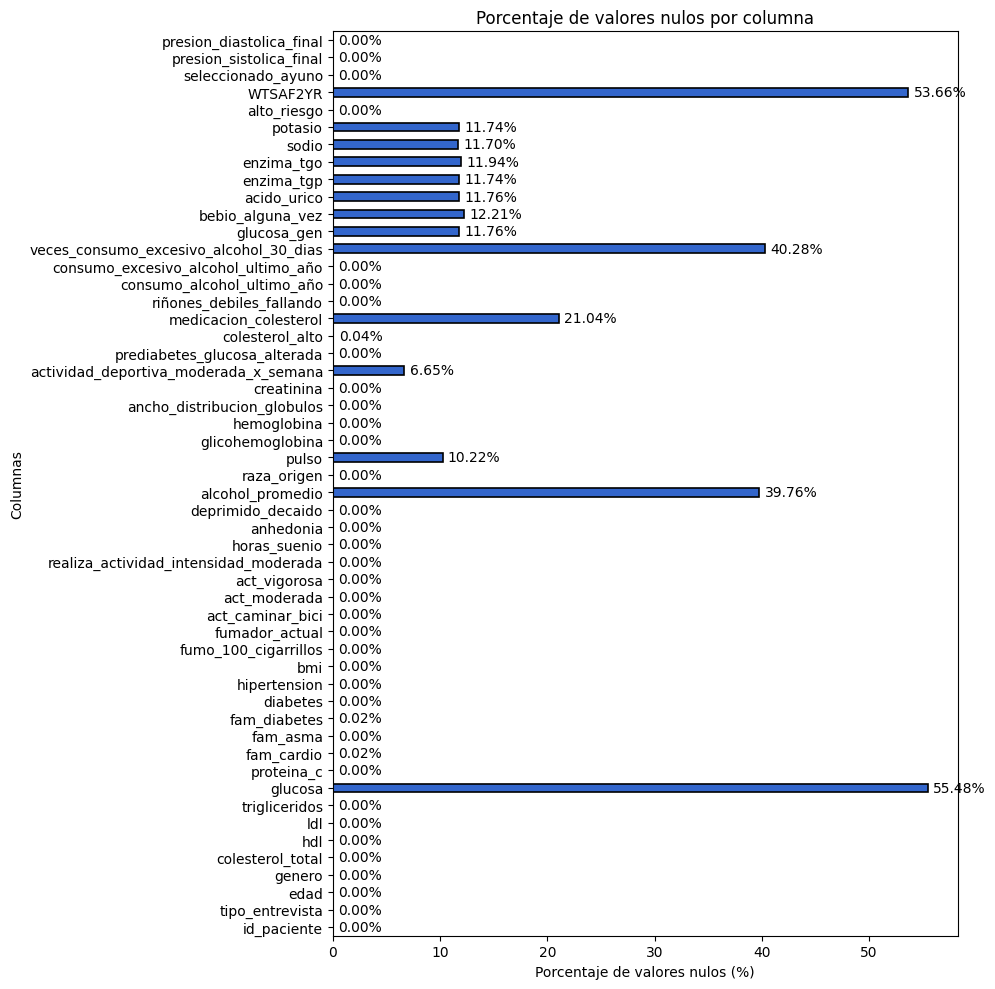

In [ ]:
porcentaje_nulos = df_train.isna().mean().round(4) * 100

plt.figure(figsize=(10, 10))
porcentaje_nulos.plot(kind='barh', color="#3366CC", edgecolor='black', linewidth=1.2)

plt.title('Porcentaje de valores nulos por columna')
plt.xlabel('Porcentaje de valores nulos (%)')
plt.ylabel('Columnas')

for index, value in enumerate(porcentaje_nulos):
    plt.text(value + 0.5, index, f'{value:.2f}%', va='center')

plt.tight_layout()
plt.show()

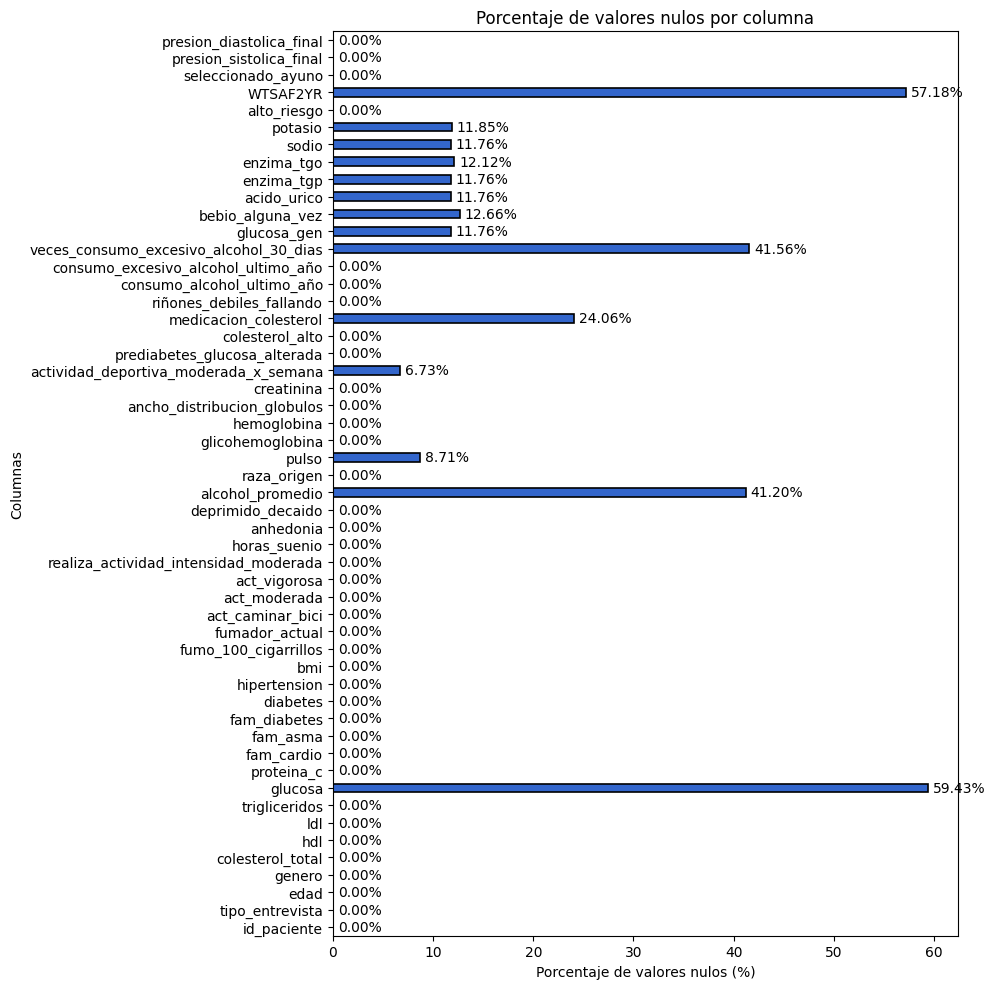

In [ ]:
porcentaje_nulos = df_test.isna().mean().round(4) * 100

plt.figure(figsize=(10, 10))
porcentaje_nulos.plot(kind='barh', color="#3366CC", edgecolor='black', linewidth=1.2)

plt.title('Porcentaje de valores nulos por columna')
plt.xlabel('Porcentaje de valores nulos (%)')
plt.ylabel('Columnas')

for index, value in enumerate(porcentaje_nulos):
    plt.text(value + 0.5, index, f'{value:.2f}%', va='center')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

imputer.fit(df_train[['actividad_deportiva_moderada_x_semana']])

df_train['actividad_deportiva_moderada_x_semana'] = imputer.transform(df_train[['actividad_deportiva_moderada_x_semana']])
df_test['actividad_deportiva_moderada_x_semana'] = imputer.transform(df_test[['actividad_deportiva_moderada_x_semana']])

### **HIPERTENSIÓN**

In [ ]:
# 1. Calculamos la moda para hipertensión
moda_hiper = df_train['hipertension'].mode()[0]

# 2. Imputamos en train y test
df_train['hipertension'] = df_train['hipertension'].fillna(moda_hiper)
df_test['hipertension'] = df_test['hipertension'].fillna(moda_hiper)

print(f"✅ Imputación de hipertension completada.")
print(f"Faltantes restantes: {df_train['hipertension'].isnull().sum()}")

✅ Imputación de hipertension completada.
Faltantes restantes: 0


### **FAM CARDIO**

In [ ]:
# 1. Calculamos la moda (el valor que más se repite, sea 1 o 2)
moda_cardio = df_train['fam_cardio'].mode()[0]

# 2. Rellenamos los faltantes (NaN) con esa moda
df_train['fam_cardio'] = df_train['fam_cardio'].fillna(moda_cardio)
df_test['fam_cardio'] = df_test['fam_cardio'].fillna(moda_cardio)

print(f"✅ Imputación de fam_cardio completada.")
print(f"Faltantes restantes: {df_train['fam_cardio'].isnull().sum()}")

✅ Imputación de fam_cardio completada.
Faltantes restantes: 0


### **FAM DIABETES**

In [ ]:
# 1. Calculamos el valor más frecuente (Moda) para antecedentes de diabetes
moda_diabetes = df_train['fam_diabetes'].mode()[0]

# 2. Rellenamos los NaN en entrenamiento y prueba
df_train['fam_diabetes'] = df_train['fam_diabetes'].fillna(moda_diabetes)
df_test['fam_diabetes'] = df_test['fam_diabetes'].fillna(moda_diabetes)

print(f"✅ Imputación de fam_diabetes completada.")
print(f"Faltantes restantes: {df_train['fam_diabetes'].isnull().sum()}")

✅ Imputación de fam_diabetes completada.
Faltantes restantes: 0


### **FAM ASMA**

In [ ]:
# 1. Calculamos la moda para antecedentes de asma
moda_asma = df_train['fam_asma'].mode()[0]

# 2. Imputamos en ambos sets
df_train['fam_asma'] = df_train['fam_asma'].fillna(moda_asma)
df_test['fam_asma'] = df_test['fam_asma'].fillna(moda_asma)

print(f"✅ Imputación de fam_asma completada.")
print(f"Faltantes en train: {df_train['fam_asma'].isnull().sum()}")

✅ Imputación de fam_asma completada.
Faltantes en train: 0


### **ACT MODERADA**

In [ ]:
# 1. Calculamos la moda para actividad moderada
moda_act = df_train['act_moderada'].mode()[0]

# 2. Imputamos en train y test
df_train['act_moderada'] = df_train['act_moderada'].fillna(moda_act)
df_test['act_moderada'] = df_test['act_moderada'].fillna(moda_act)

print(f"✅ Imputación de act_moderada completada.")
print(f"Faltantes restantes: {df_train['act_moderada'].isnull().sum()}")

✅ Imputación de act_moderada completada.
Faltantes restantes: 0


### **ACT CAMINAR BICI**

In [ ]:
# 1. Calculamos la moda para actividad de caminar o bicicleta
moda_bici = df_train['act_caminar_bici'].mode()[0]

# 2. Imputamos en train y test
df_train['act_caminar_bici'] = df_train['act_caminar_bici'].fillna(moda_bici)
df_test['act_caminar_bici'] = df_test['act_caminar_bici'].fillna(moda_bici)

print(f"✅ Imputación de act_caminar_bici completada.")
print(f"Faltantes restantes: {df_train['act_caminar_bici'].isnull().sum()}")

✅ Imputación de act_caminar_bici completada.
Faltantes restantes: 0


### **COLESTEROL ALTO**

In [ ]:
# 1. Calculamos la moda para colesterol_alto
moda_col = df_train['colesterol_alto'].mode()[0]

# 2. Imputamos en train y test
df_train['colesterol_alto'] = df_train['colesterol_alto'].fillna(moda_col)
df_test['colesterol_alto'] = df_test['colesterol_alto'].fillna(moda_col)

print(f"✅ Imputación de colesterol_alto completada.")
print(f"Faltantes restantes en train: {df_train['colesterol_alto'].isnull().sum()}")

✅ Imputación de colesterol_alto completada.
Faltantes restantes en train: 0


### **RIÑONES DÉBILES FALLANDO**

In [ ]:
# 1. Calculamos la moda para problemas renales
moda_rinon = df_train['riñones_debiles_fallando'].mode()[0]

# 2. Imputamos en train y test
df_train['riñones_debiles_fallando'] = df_train['riñones_debiles_fallando'].fillna(moda_rinon)
df_test['riñones_debiles_fallando'] = df_test['riñones_debiles_fallando'].fillna(moda_rinon)

print(f"✅ Imputación de riñones_debiles_fallando completada.")
print(f"Faltantes restantes: {df_train['riñones_debiles_fallando'].isnull().sum()}")

✅ Imputación de riñones_debiles_fallando completada.
Faltantes restantes: 0


### **ACIDO URICO**

In [ ]:
cols_for_acido_urico_knn = ['edad', 'genero', 'bmi', 'acido_urico']
imputer_acido_urico = KNNImputer(n_neighbors=5)

df_train[cols_for_acido_urico_knn] = imputer_acido_urico.fit_transform(df_train[cols_for_acido_urico_knn])
df_test[cols_for_acido_urico_knn] = imputer_acido_urico.transform(df_test[cols_for_acido_urico_knn])

print("Acido Urico imputation complete.")
print(f"Missing acido_urico in df_train: {df_train['acido_urico'].isnull().sum()}")
print(f"Missing acido_urico in df_test: {df_test['acido_urico'].isnull().sum()}")

Acido Urico imputation complete.
Missing acido_urico in df_train: 0
Missing acido_urico in df_test: 0


### **ENZIMA TGP**

In [ ]:
cols_for_enzima_tgp_knn = ['edad', 'genero', 'bmi', 'enzima_tgp']
imputer_enzima_tgp = KNNImputer(n_neighbors=5)

df_train[cols_for_enzima_tgp_knn] = imputer_enzima_tgp.fit_transform(df_train[cols_for_enzima_tgp_knn])
df_test[cols_for_enzima_tgp_knn] = imputer_enzima_tgp.transform(df_test[cols_for_enzima_tgp_knn])

print("Enzima TGP imputation complete.")
print(f"Missing enzima_tgp in df_train: {df_train['enzima_tgp'].isnull().sum()}")
print(f"Missing enzima_tgp in df_test: {df_test['enzima_tgp'].isnull().sum()}")

Enzima TGP imputation complete.
Missing enzima_tgp in df_train: 0
Missing enzima_tgp in df_test: 0


### **ENZIMA TGO**

In [ ]:
cols_for_enzima_tgo_knn = ['edad', 'genero', 'bmi', 'enzima_tgo']
imputer_enzima_tgo = KNNImputer(n_neighbors=5)

df_train[cols_for_enzima_tgo_knn] = imputer_enzima_tgo.fit_transform(df_train[cols_for_enzima_tgo_knn])
df_test[cols_for_enzima_tgo_knn] = imputer_enzima_tgo.transform(df_test[cols_for_enzima_tgo_knn])

print("Enzima TGO imputation complete.")
print(f"Missing enzima_tgo in df_train: {df_train['enzima_tgo'].isnull().sum()}")
print(f"Missing enzima_tgo in df_test: {df_test['enzima_tgo'].isnull().sum()}")

Enzima TGO imputation complete.
Missing enzima_tgo in df_train: 0
Missing enzima_tgo in df_test: 0


### **SODIO**

In [ ]:
cols_for_sodio_knn = ['edad', 'genero', 'bmi', 'sodio']
imputer_sodio = KNNImputer(n_neighbors=5)

df_train[cols_for_sodio_knn] = imputer_sodio.fit_transform(df_train[cols_for_sodio_knn])
df_test[cols_for_sodio_knn] = imputer_sodio.transform(df_test[cols_for_sodio_knn])

print("Sodio imputation complete.")
print(f"Missing sodio in df_train: {df_train['sodio'].isnull().sum()}")
print(f"Missing sodio in df_test: {df_test['sodio'].isnull().sum()}")

Sodio imputation complete.
Missing sodio in df_train: 0
Missing sodio in df_test: 0


### **POTASIO**

In [ ]:
cols_for_potasio_knn = ['edad', 'genero', 'bmi', 'potasio']
imputer_potasio = KNNImputer(n_neighbors=5)

df_train[cols_for_potasio_knn] = imputer_potasio.fit_transform(df_train[cols_for_potasio_knn])
df_test[cols_for_potasio_knn] = imputer_potasio.transform(df_test[cols_for_potasio_knn])

print("Potasio imputation complete.")
print(f"Missing potasio in df_train: {df_train['potasio'].isnull().sum()}")
print(f"Missing potasio in df_test: {df_test['potasio'].isnull().sum()}")

Potasio imputation complete.
Missing potasio in df_train: 0
Missing potasio in df_test: 0


-------------------------------------------------------------------------

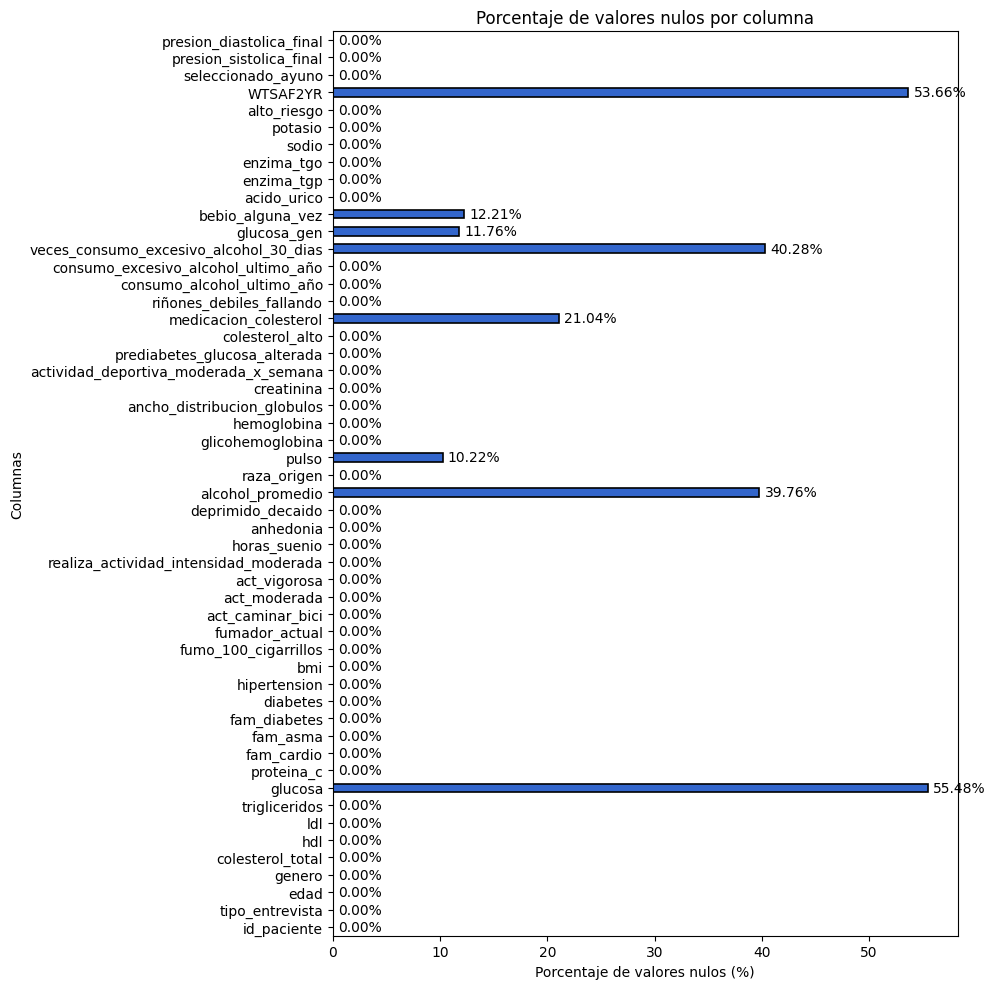

In [ ]:
porcentaje_nulos = df_train.isna().mean().round(4) * 100

plt.figure(figsize=(10, 10))
porcentaje_nulos.plot(kind='barh', color="#3366CC", edgecolor='black', linewidth=1.2)

plt.title('Porcentaje de valores nulos por columna')
plt.xlabel('Porcentaje de valores nulos (%)')
plt.ylabel('Columnas')

for index, value in enumerate(porcentaje_nulos):
    plt.text(value + 0.5, index, f'{value:.2f}%', va='center')

plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5568 entries, 0 to 5567
Data columns (total 62 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id_paciente                             5568 non-null   float64
 1   tipo_entrevista                         5568 non-null   float64
 2   edad                                    5568 non-null   float64
 3   genero                                  5568 non-null   float64
 4   presion_sis_1                           4658 non-null   float64
 5   presion_sis_2                           4885 non-null   float64
 6   presion_sis_3                           4872 non-null   float64
 7   colesterol_total                        5568 non-null   float64
 8   hdl                                     4936 non-null   float64
 9   ldl                                     2368 non-null   float64
 10  trigliceridos                           4924 non-null   floa

| Variable | Imputación |
| --- | --- |
| edad | - |
| genero | - |
| presion_sis_1 | PROM + KNN |
| presion_sis_2 | PROM + KNN |
| presion_sis_3 | PROM + KNN |
| colesterol_total | KNN |
| hdl | KNN |
| ldl | Cálculo + KNN |
| trigliceridos | KNN |
| glucosa | A REVISAR |
| proteina_c | KNN |
| fam_cardio | Moda |
| fam_asma | - |
| fam_diabetes | Moda |
| diabetes | - |
| hipertension | - |
| bmi | Mediana por rango de edad |
| fumador_hist | - |
| fumador_actual | ASIGNACIÓN DE VALOR SEGÚN FUNCIONAMIENTO DE LA ENCUESTA |
| act_caminar_bici | - |
| act_moderada | - |
| act_vigorosa | - |
| tiempo_sentado | - |
| horas_suenio | Mediana |
| anhedonia | KNN |
| deprimido_decaido | KNN |
| alcohol_promedio |  |
| raza_origen | - |
| presion_dis_1 | PROM + KNN |
| presion_dis_2 | PROM + KNN |
| presion_dis_3 | PROM + KNN |
| pulso |  |
| glicohemoglobina | KNN(VER SI SE USA) |
| hemoglobina | KNN |
| ancho_distribucion_globulos | KNN |
| creatinina | KNN |
| actividad_deportiva_moderada_x_semana | ASIGNACIÓN DE VALOR SEGÚN FUNCIONAMIENTO DE LA ENCUESTA + KNN |
| prediabetes_glucosa_alterada | KNN |
| colesterol_alto | - |
| medicacion_colesterol |  |
| riñones_debiles_fallando | - |
| consumo_alcohol_ultimo_año | ASIGNACIÓN VALOR + KNN |
| consumo_excesivo_alcohol_ultimo_año | ASIGNACIÓN VALOR + KNN |
| veces_consumo_excesivo_alcohol_30_dias |  |
| consumo_actual_tab_sin_humo | - |


In [ ]:
# Crear diccionario con los nombres cortos que corresponden solo a tus features
short_names_dict = {
    "SEQN": "id_paciente",
    "RIDSTATR": "tipo_entrevista",
    "RIDAGEYR": "edad",
    "RIAGENDR": "genero",
    "BPXSY1": "presion_sis_1",
    "BPXSY2": "presion_sis_2",
    "BPXSY3": "presion_sis_3",
    "LBXTC": "colesterol_total",
    "LBDHDD": "hdl",
    "LBDLDL": "ldl",
    "LBXTR": "trigliceridos",
    "LBXGLU": "glucosa",
    "LBXHSCRP": "proteina_c",
    "MCQ300A": "fam_cardio",
    "MCQ300B": "fam_asma",
    "MCQ300C": "fam_diabetes",
    "DIQ010": "diabetes",
    "BPQ020": "hipertension",
    "BMXBMI": "bmi",
    "SMQ020": "fumador_hist",
    "SMQ040": "fumador_actual",
    "PAQ605": "act_caminar_bici",
    "PAQ620": "act_moderada",
    "PAQ635": "act_vigorosa",
    "PAQ650": "tiempo_sentado",
    "SLD012": "horas_suenio",
    "DPQ010": "anhedonia",
    "DPQ020": "deprimido_decaido",
    # "DPQ030": "depresion_3",
    # "DPQ040": "depresion_4",
    # "DPQ050": "depresion_5",
    # "DPQ060": "depresion_6",
    # "DPQ070": "depresion_7",
    # "DPQ080": "depresion_8",
    # "DPQ090": "depresion_9",
    "ALQ130": "alcohol_promedio",
    "DR1TSUGR": "azucar_total_dia",
    "SMQ910": "consumo_actual_tab_sin_humo",
    #
    # "RIDRETH1": "Recodificación de información reportada sobre raza y origen hispano",
    "RIDRETH3": "raza_origen",
    "BPXDI1" : "presion_dis_1",
    "BPXDI2" : "presion_dis_2",
    "BPXDI3" : "presion_dis_3",
    "BPXPULS": "pulso", # numerica binaria
    "LBXGH" :	"glicohemoglobina", # numerica
    "LBXHGB":  "hemoglobina",
    "LBXRDW": "ancho_distribucion_globulos",
    "LBXSCR": "creatinina",
    # "PAQ665": "actividad_deportiva moderada, sí/no)",
    "PAQ670": "actividad_deportiva_moderada_x_semana",
    "DIQ160": "prediabetes_glucosa_alterada",
    "MCQ160F": "ACV",
    "BPQ080": "colesterol_alto",
    "BPQ090D": "medicacion_colesterol",
    "KIQ022" : "riñones_debiles_fallando",
    "ALQ121": "consumo_alcohol_ultimo_año",
    "ALQ142": "consumo_excesivo_alcohol_ultimo_año",
    "ALQ170": "veces_consumo_excesivo_alcohol_30_dias",
    "LBDSTRSI": "trigliceridos_2",
    "LBDHDDSI": "hdl_2",
    "LBDGLUSI": "glucosa_2",
    "LBDLDLSI":"ldl_2",
    "LBXSGL": "glucosa_gen"
}

In [ ]:
columnas_a_borrar = [
    'id_paciente', 'tipo_entrevista', 'WTSAF2YR',
    'bebio_alguna_vez', 'glucosa_gen', 'medicacion_colesterol',
    'alcohol_promedio', 'pulso','veces_consumo_excesivo_alcohol_30_dias'
]

# Borramos las columnas en df_train y df_test
# errors='ignore' evita que el código falle si alguna columna ya fue borrada antes
df_train = df_train.drop(columns=columnas_a_borrar, errors='ignore')
df_test = df_test.drop(columns=columnas_a_borrar, errors='ignore')

print(f"Columnas eliminadas. Nuevo tamaño de df_train: {df_train.shape}")
print(f"Columnas eliminadas. Nuevo tamaño de df_test: {df_test.shape}")

Columnas eliminadas. Nuevo tamaño de df_train: (4454, 43)
Columnas eliminadas. Nuevo tamaño de df_test: (1114, 43)


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4454 entries, 4331 to 685
Data columns (total 43 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   edad                                   4454 non-null   float64
 1   genero                                 4454 non-null   float64
 2   colesterol_total                       4454 non-null   float64
 3   hdl                                    4454 non-null   float64
 4   ldl                                    4454 non-null   float64
 5   trigliceridos                          4454 non-null   float64
 6   glucosa                                1983 non-null   float64
 7   proteina_c                             4454 non-null   float64
 8   fam_cardio                             4454 non-null   float64
 9   fam_asma                               4454 non-null   float64
 10  fam_diabetes                           4454 non-null   float64
 11  diabete

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1114 entries, 2007 to 2284
Data columns (total 43 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   edad                                   1114 non-null   float64
 1   genero                                 1114 non-null   float64
 2   colesterol_total                       1114 non-null   float64
 3   hdl                                    1114 non-null   float64
 4   ldl                                    1114 non-null   float64
 5   trigliceridos                          1114 non-null   float64
 6   glucosa                                452 non-null    float64
 7   proteina_c                             1114 non-null   float64
 8   fam_cardio                             1114 non-null   float64
 9   fam_asma                               1114 non-null   float64
 10  fam_diabetes                           1114 non-null   float64
 11  diabet

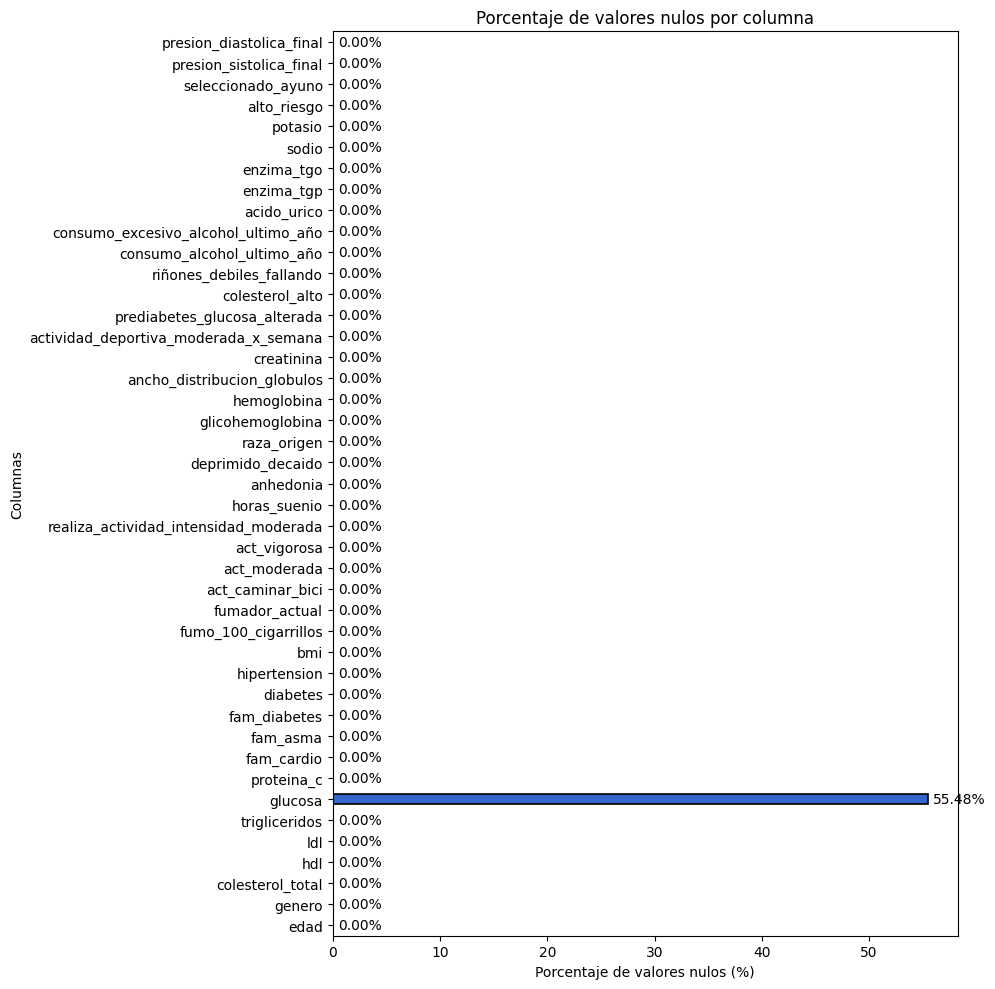

In [ ]:
porcentaje_nulos = df_train.isna().mean().round(4) * 100

plt.figure(figsize=(10, 10))
porcentaje_nulos.plot(kind='barh', color="#3366CC", edgecolor='black', linewidth=1.2)

plt.title('Porcentaje de valores nulos por columna')
plt.xlabel('Porcentaje de valores nulos (%)')
plt.ylabel('Columnas')

for index, value in enumerate(porcentaje_nulos):
    plt.text(value + 0.5, index, f'{value:.2f}%', va='center')

plt.tight_layout()
plt.show()

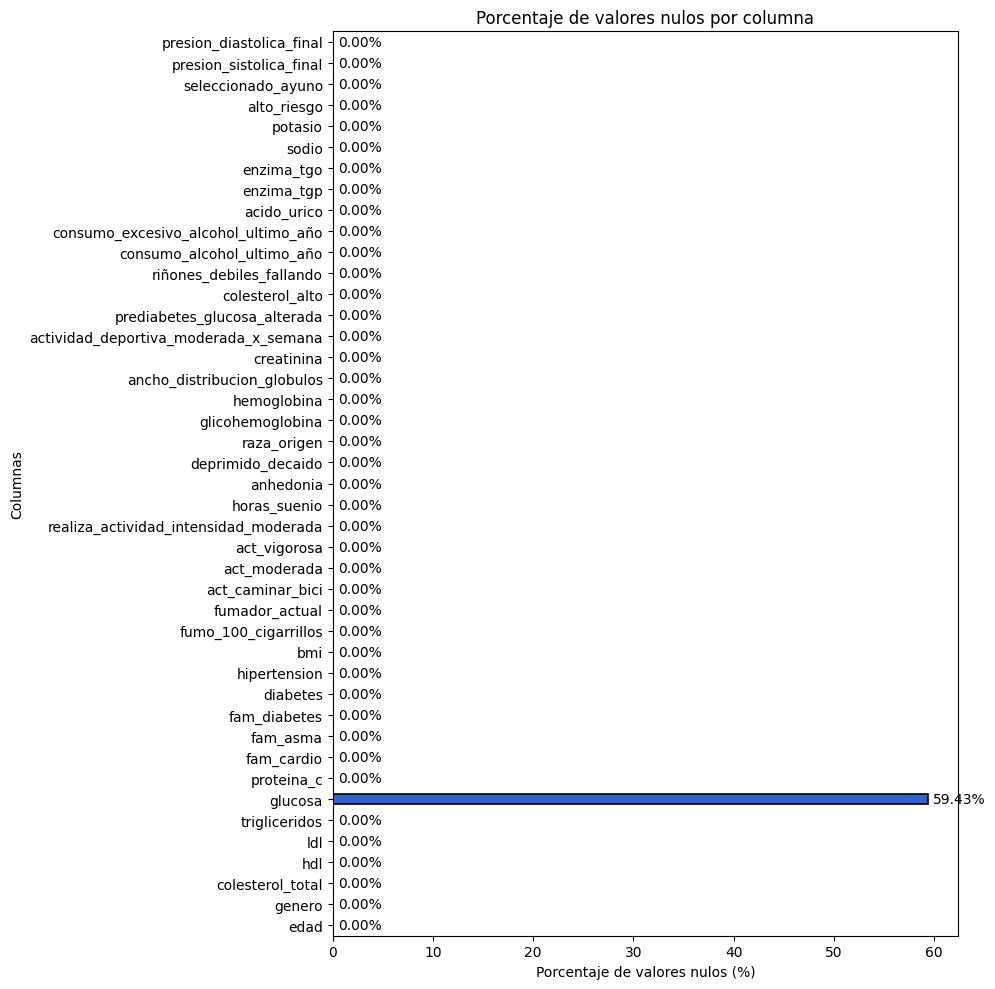

In [ ]:
porcentaje_nulos = df_test.isna().mean().round(4) * 100

plt.figure(figsize=(10, 10))
porcentaje_nulos.plot(kind='barh', color="#3366CC", edgecolor='black', linewidth=1.2)

plt.title('Porcentaje de valores nulos por columna')
plt.xlabel('Porcentaje de valores nulos (%)')
plt.ylabel('Columnas')

for index, value in enumerate(porcentaje_nulos):
    plt.text(value + 0.5, index, f'{value:.2f}%', va='center')

plt.tight_layout()
plt.show()

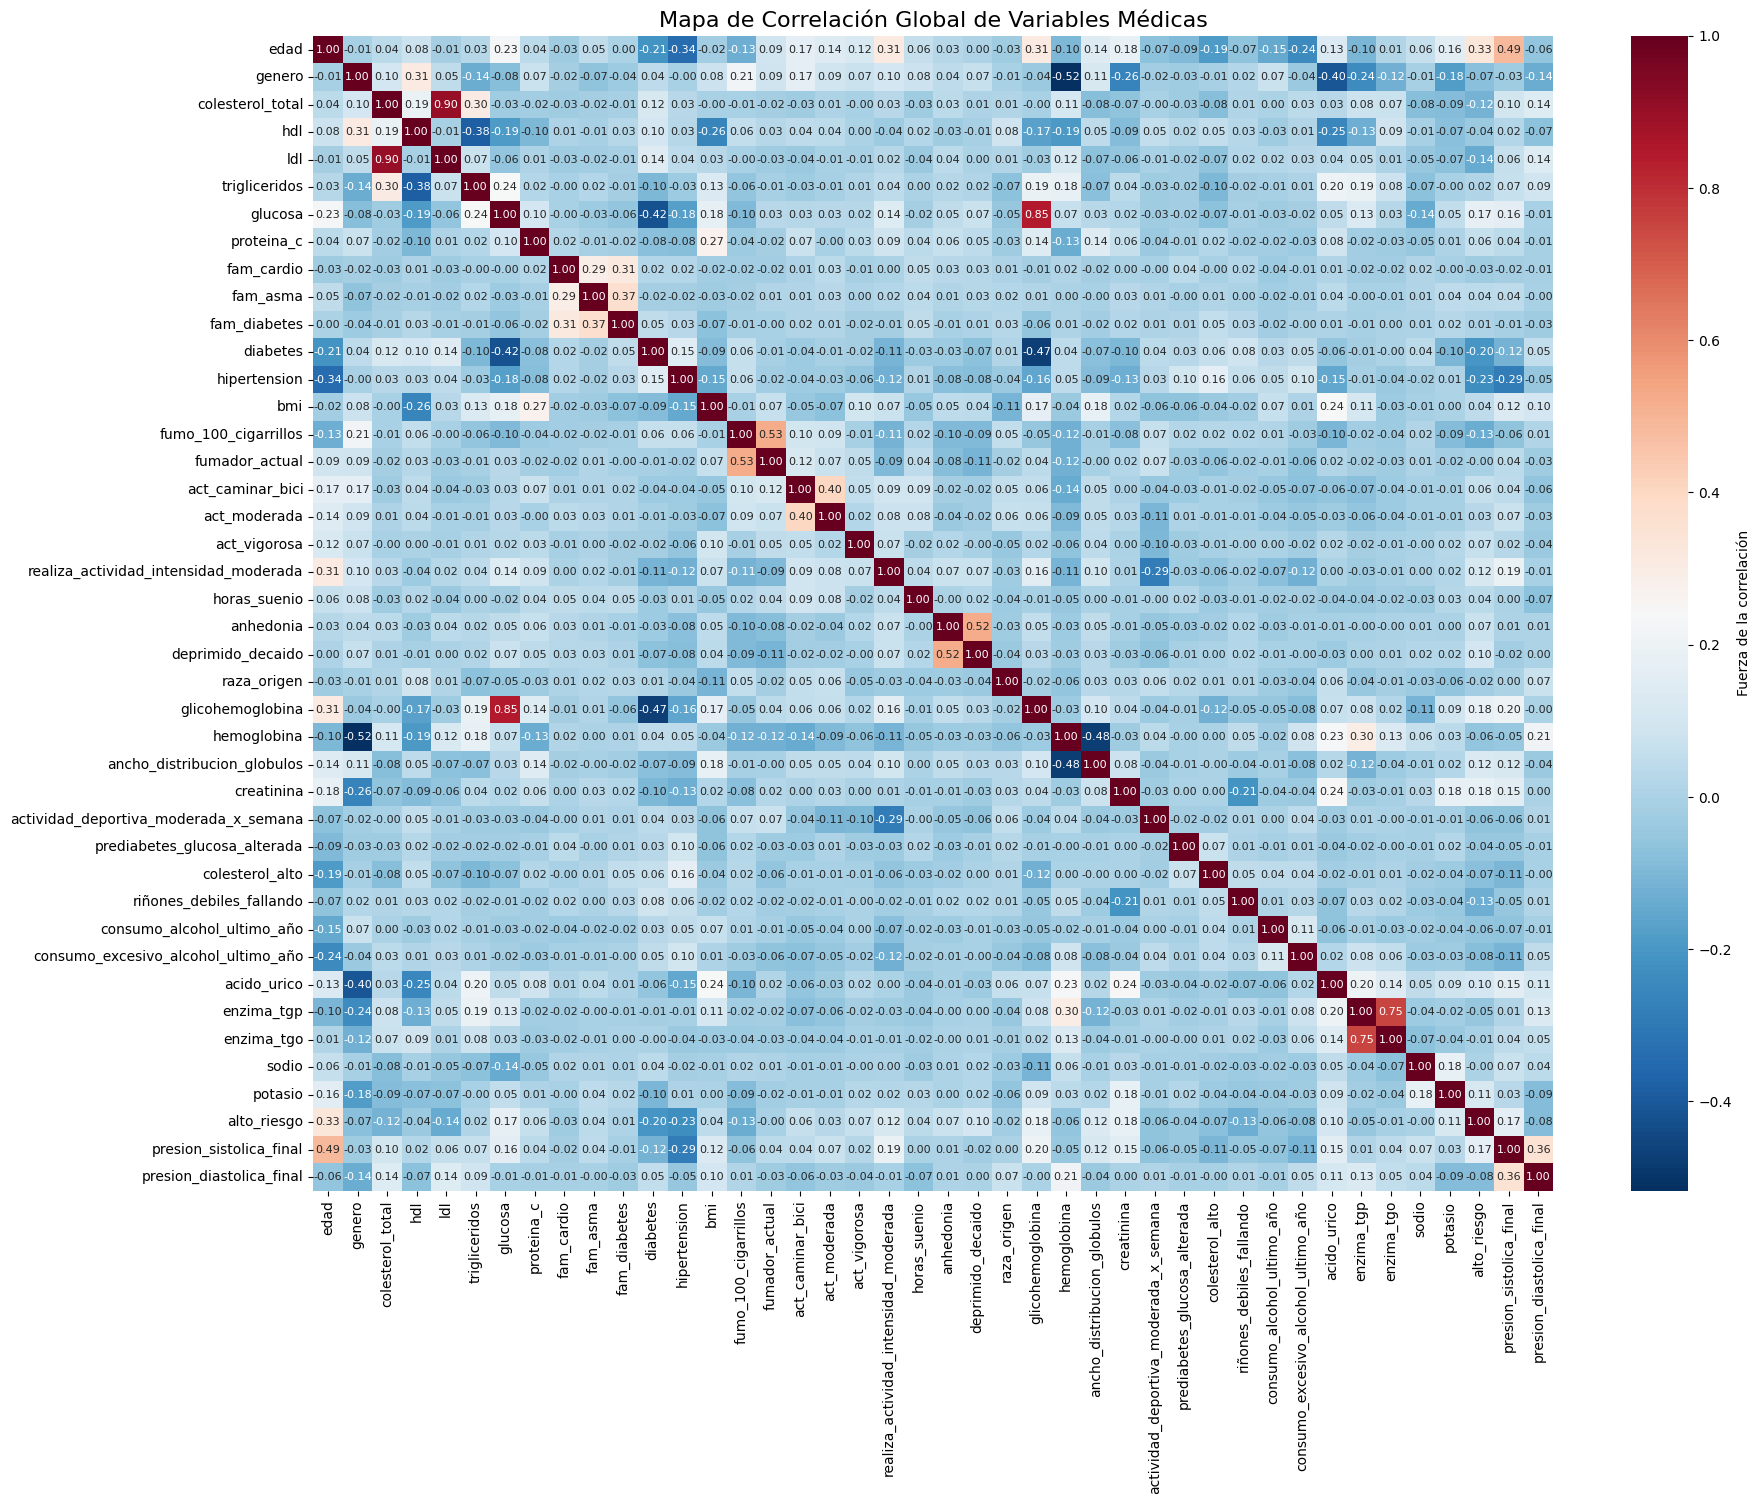

In [ ]:
# Seleccionamos todas las variables numéricas y las que ya codificamos a 0/1
# Excluimos solo ID si es que todavía existe, el resto va todo.
cols_completas = df_train.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(20, 15)) # Aumentamos el tamaño para que entre todo

# Calculamos la correlación
matriz_completa = df_train[cols_completas].corr()

# Dibujamos el mapa
sns.heatmap(matriz_completa,
            annot=True,       # Muestra los números
            cmap='RdBu_r',    # Rojo (positivo), Azul (negativo)
            fmt=".2f",        # 2 decimales
            annot_kws={"size": 8}, # Achicamos la letra de los números
            cbar_kws={'label': 'Fuerza de la correlación'})

plt.title('Mapa de Correlación Global de Variables Médicas', fontsize=16)
plt.show()

vemos relacion fuerte entre colesterol total y ldl, y glucosa y glicohemoglobina. Se tomará colesterol total y por el momento glicohemoglobina. Tmabien, vamos a tomr la variable anhedonia y no deprimido_decaido

In [ ]:
columnas_a_borrar = [
    'deprimido_decaido', 'glucosa'
]

# Borramos las columnas en df_train y df_test
# errors='ignore' evita que el código falle si alguna columna ya fue borrada antes
df_train = df_train.drop(columns=columnas_a_borrar, errors='ignore')
df_test = df_test.drop(columns=columnas_a_borrar, errors='ignore')

print(f"Columnas eliminadas. Nuevo tamaño de df_train: {df_train.shape}")
print(f"Columnas eliminadas. Nuevo tamaño de df_test: {df_test.shape}")

Columnas eliminadas. Nuevo tamaño de df_train: (4454, 41)
Columnas eliminadas. Nuevo tamaño de df_test: (1114, 41)


## **OUTLIERS**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5568 entries, 0 to 5567
Data columns (total 62 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id_paciente                             5568 non-null   float64
 1   tipo_entrevista                         5568 non-null   float64
 2   edad                                    5568 non-null   float64
 3   genero                                  5568 non-null   float64
 4   presion_sis_1                           4658 non-null   float64
 5   presion_sis_2                           4885 non-null   float64
 6   presion_sis_3                           4872 non-null   float64
 7   colesterol_total                        5568 non-null   float64
 8   hdl                                     4936 non-null   float64
 9   ldl                                     2368 non-null   float64
 10  trigliceridos                           4924 non-null   floa

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4454 entries, 4331 to 685
Data columns (total 41 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   edad                                   4454 non-null   float64
 1   genero                                 4454 non-null   float64
 2   colesterol_total                       4454 non-null   float64
 3   hdl                                    4454 non-null   float64
 4   ldl                                    4454 non-null   float64
 5   trigliceridos                          4454 non-null   float64
 6   proteina_c                             4454 non-null   float64
 7   fam_cardio                             4454 non-null   float64
 8   fam_asma                               4454 non-null   float64
 9   fam_diabetes                           4454 non-null   float64
 10  diabetes                               4454 non-null   float64
 11  hiperte

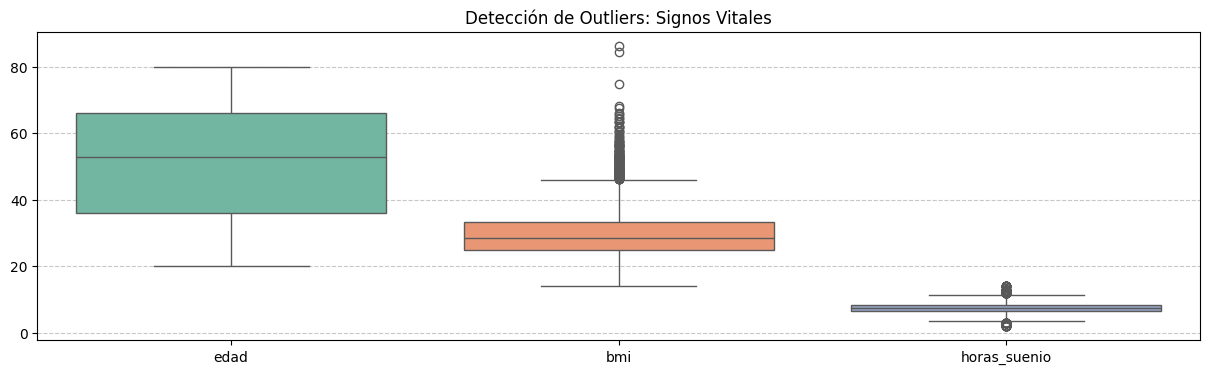

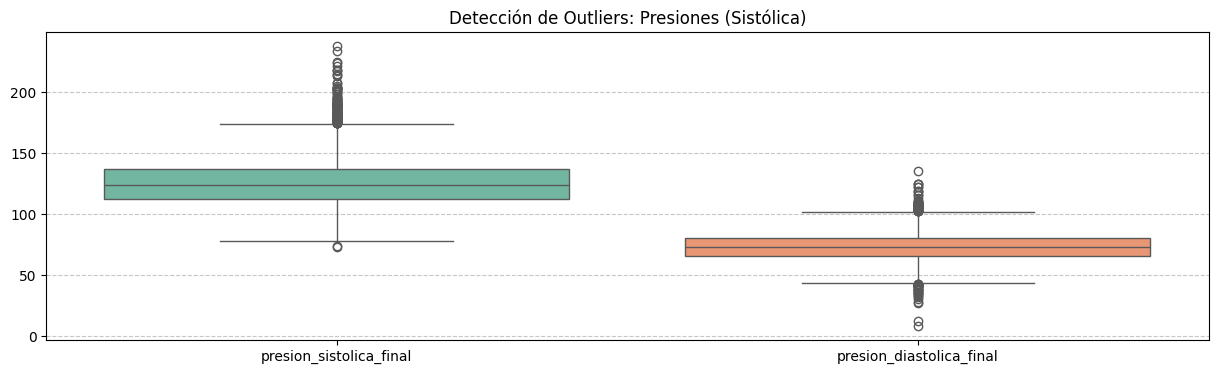

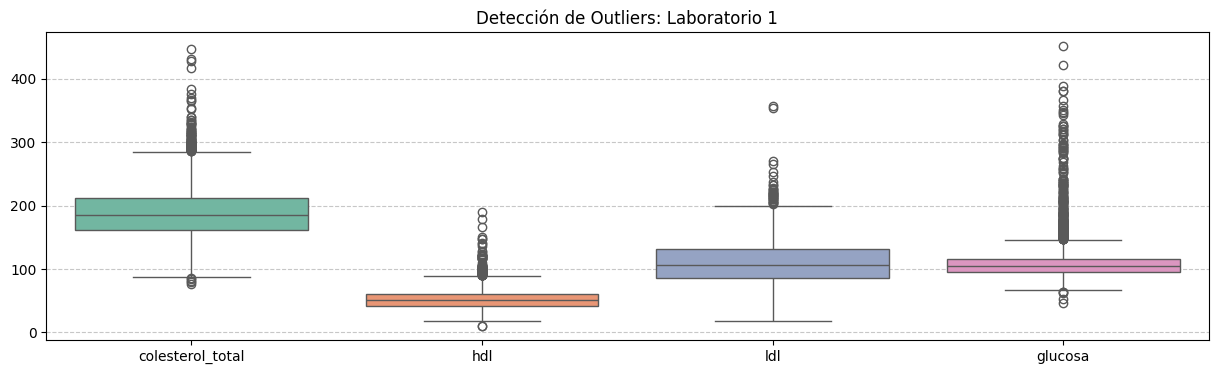

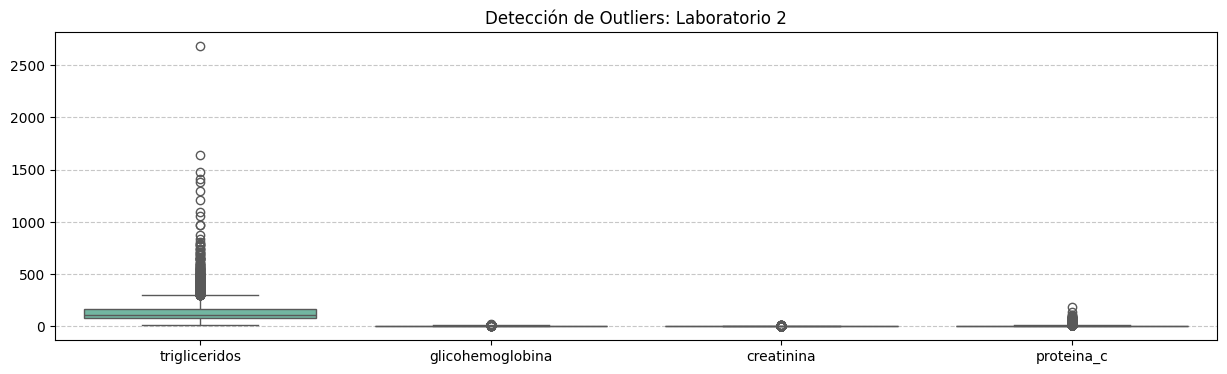

In [ ]:
grupos = {
    "Signos Vitales": ['edad', 'bmi', 'horas_suenio'],
    "Presiones (Sistólica)": ['presion_sistolica_final', 'presion_diastolica_final'],
    "Laboratorio 1": ['colesterol_total', 'hdl', 'ldl', 'glucosa'],
    "Laboratorio 2": ['trigliceridos', 'glicohemoglobina', 'creatinina', 'proteina_c']
}

for titulo, cols in grupos.items():
    plt.figure(figsize=(15, 4))
    sns.boxplot(data=df[cols], palette="Set2")
    plt.title(f'Detección de Outliers: {titulo}')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

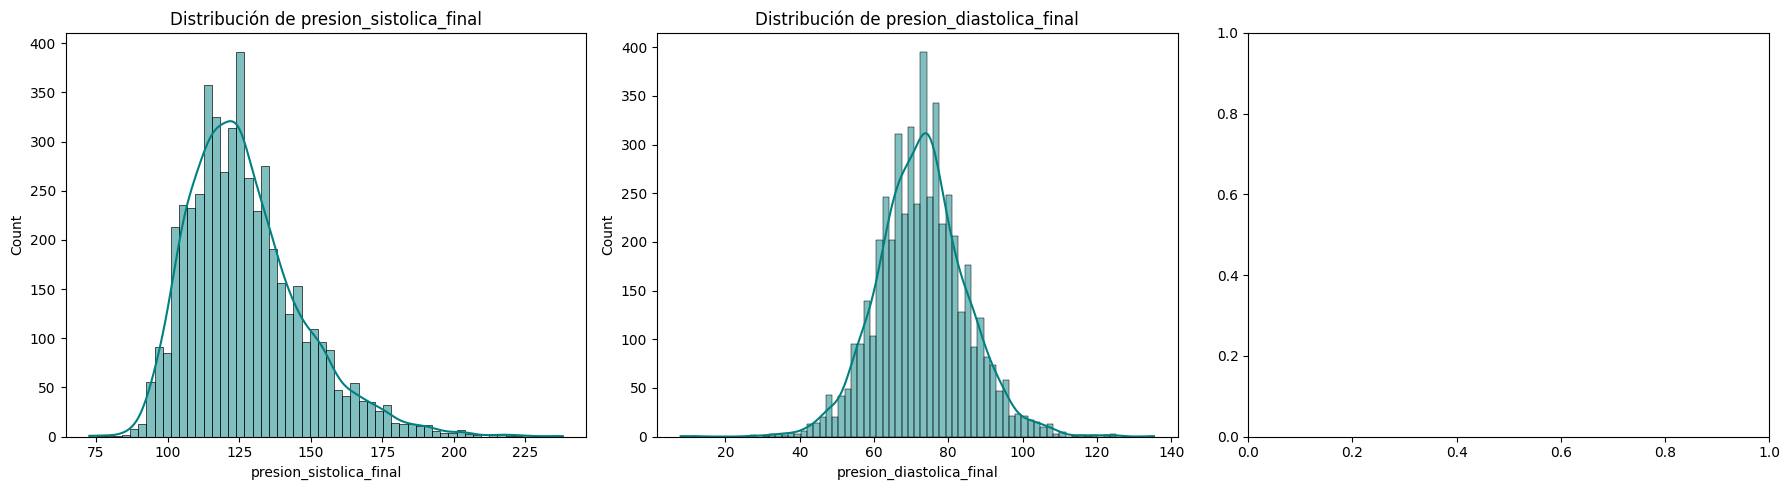

In [ ]:
cols = ['presion_sistolica_final', 'presion_diastolica_final']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color='teal')
    axes[i].set_title(f'Distribución de {col}')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Consumo Alcohol (Último Año)')

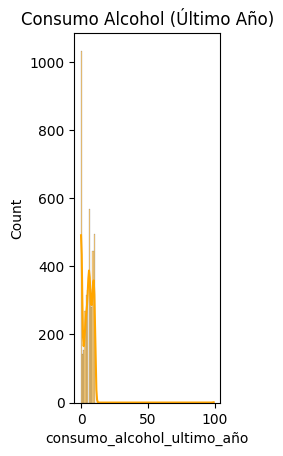

In [ ]:
# 3. Consumo Alcohol Último Año (Distribución)
plt.subplot(1, 3, 3)
sns.histplot(df['consumo_alcohol_ultimo_año'], kde=True, color='orange')
plt.title('Consumo Alcohol (Último Año)')

### **TRANSFORMACIÓN LOGARITMICA**

In [ ]:
variables_log = ['trigliceridos', 'colesterol_total','bmi','presion_sistolica_final', 'presion_diastolica_final', 'glicohemoglobina','proteina_c',
    'ancho_distribucion_globulos', 'hemoglobina', 'hdl','acido_urico','enzima_tgp','enzima_tgo','sodio','potasio']

for col in variables_log:
    df_train[col] = np.log1p(df_train[col])
    df_test[col] = np.log1p(df_test[col])

print("✅ Transformación logarítmica aplicada")

✅ Transformación logarítmica aplicada


### **BMI**

Aplico transformación logaritmica para disminuir el impacto de los outliers

In [ ]:
# # Aplicamos logaritmo para comprimir la cola larga sin borrar la diferencia entre 60 y 80
# df_train['bmi'] = np.log1p(df_train['bmi'])
# df_test['bmi'] = np.log1p(df_test['bmi'])

# df_train['bmi'].hist(bins=50)

/tmp/ipython-input-930846356.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=axes[i], palette='magma')
/tmp/ipython-input-930846356.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=axes[i], palette='magma')


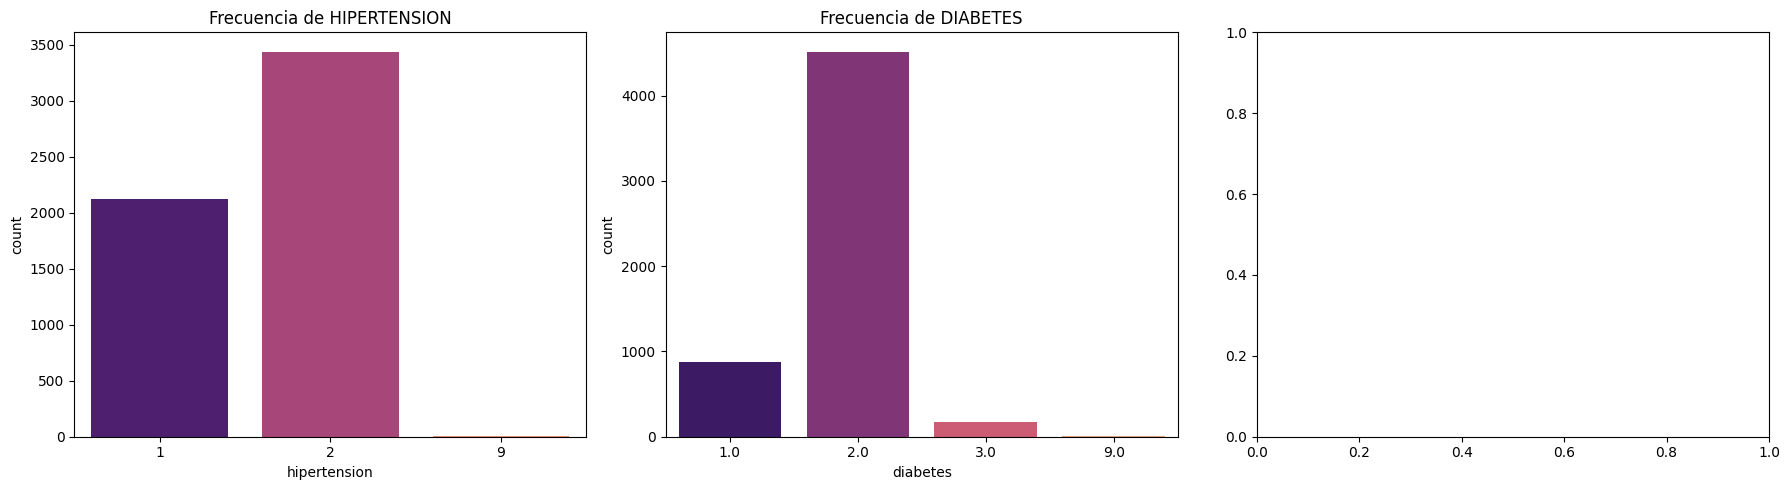

In [ ]:
cols = ['hipertension', 'diabetes']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(cols):
    sns.countplot(x=df[col], ax=axes[i], palette='magma')
    axes[i].set_title(f'Frecuencia de {col.upper()}')
plt.tight_layout()
plt.show()

In [ ]:
df_train['actividad_deportiva_moderada_x_semana'].value_counts()

,count
actividad_deportiva_moderada_x_semana,
0.0,2688
3.0,454
2.0,377
5.0,242
4.0,231
7.0,196
1.0,196
6.0,70


In [ ]:
df_train['act_vigorosa'].value_counts()

,count
act_vigorosa,
2.0,3398
1.0,1056


In [ ]:
df_train['diabetes'].value_counts()

,count
diabetes,
2.0,3598
1.0,713
3.0,139
9.0,4


## **CODIFICACIÓN**

In [ ]:
vars_a_revisar = [
    'genero', 'raza_origen', 'fam_cardio', 'fam_asma', 'fam_diabetes',
    'diabetes', 'hipertension', 'fumo_100_cigarrillos', 'fumador_actual',
    'act_caminar_bici', 'act_moderada', 'act_vigorosa',
    'realiza_actividad_intensidad_moderada', 'anhedonia',
    'prediabetes_glucosa_alterada', 'colesterol_alto',
    'riñones_debiles_fallando', 'consumo_excesivo_alcohol_ultimo_año'
]

print("🔍 REVISIÓN DE VALORES ÚNICOS POR VARIABLE:\n")
for col in vars_a_revisar:
    if col in df_train.columns:
        print(f"--- {col.upper()} ---")
        print(df_train[col].value_counts().sort_index())
        print("-" * 30)

🔍 REVISIÓN DE VALORES ÚNICOS POR VARIABLE:

--- GENERO ---
genero
1.0    2175
2.0    2279
Name: count, dtype: int64
------------------------------
--- RAZA_ORIGEN ---
raza_origen
1     575
2     428
3    1552
4    1056
6     627
7     216
Name: count, dtype: int64
------------------------------
--- FAM_CARDIO ---
fam_cardio
1.0     573
2.0    3776
9.0     105
Name: count, dtype: int64
------------------------------
--- FAM_ASMA ---
fam_asma
1.0    1000
2.0    3365
9.0      89
Name: count, dtype: int64
------------------------------
--- FAM_DIABETES ---
fam_diabetes
1.0    2103
2.0    2285
9.0      66
Name: count, dtype: int64
------------------------------
--- DIABETES ---
diabetes
1.0     713
2.0    3598
3.0     139
9.0       4
Name: count, dtype: int64
------------------------------
--- HIPERTENSION ---
hipertension
1    1709
2    2736
9       9
Name: count, dtype: int64
------------------------------
--- FUMO_100_CIGARRILLOS ---
fumo_100_cigarrillos
1.0    1886
2.0    2568
Name: cou

### **Género**

Binario: con codificación actual, algunos algoritmos podrían interpretar que el género femenino tiene "el doble de peso" o magnitud que el masculino.

In [ ]:
# Mapeo: 1.0 (Hombre) -> 0, 2.0 (Mujer) -> 1
df_train['genero'] = df_train['genero'].map({1.0: 0, 2.0: 1})
df_test['genero'] = df_test['genero'].map({1.0: 0, 2.0: 1})

# Verificación rápida
print("Valores de Género (0=H, 1=M):")
print(df_train['genero'].value_counts())

Valores de Género (0=H, 1=M):
genero
1    2279
0    2175
Name: count, dtype: int64


### **RAZA**

One hot encoding

In [ ]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

raza_encoded_train = encoder.fit_transform(df_train[['raza_origen']])
raza_encoded_test = encoder.transform(df_test[['raza_origen']])

col_names = encoder.get_feature_names_out(['raza_origen'])

df_raza_train = pd.DataFrame(raza_encoded_train, columns=col_names, index=df_train.index)
df_raza_test = pd.DataFrame(raza_encoded_test, columns=col_names, index=df_test.index)

df_train = pd.concat([df_train.drop('raza_origen', axis=1), df_raza_train], axis=1)
df_test = pd.concat([df_test.drop('raza_origen', axis=1), df_raza_test], axis=1)

print("✅ Raza codificada con OneHotEncoder de Sklearn.")

✅ Raza codificada con OneHotEncoder de Sklearn.


### **BINARIOS**

In [ ]:
# Lista de variables a convertir de (1,2) a (1,0)
vars_binarias = ['fumo_100_cigarrillos',
    'act_vigorosa', 'realiza_actividad_intensidad_moderada']

for col in vars_binarias:
    # 1.0 se queda como 1, 2.0 pasa a ser 0
    df_train[col] = df_train[col].map({1.0: 1, 2.0: 0})
    df_test[col] = df_test[col].map({1.0: 1, 2.0: 0})

print("✅ Bloque de 13 variables binarias convertido a (0,1).")

✅ Bloque de 13 variables binarias convertido a (0,1).


horas sueño

In [ ]:
import pandas as pd
import numpy as np

def limpiar_columna_suenio(df):
    # Creamos una copia para no afectar el original por error
    df = df.copy()

    # 2 -> Menos de 3 horas (usamos 2.5 como estimación)
    # 14 -> 14 horas o más
    # Los valores entre 3 y 13.5 se mantienen igual
    df['horas_suenio'] = df['horas_suenio'].replace({2: 2.5, 14: 14.0})

    # Convertimos a numérico (por si hay algún string o punto '.')
    df['horas_suenio'] = pd.to_numeric(df['horas_suenio'], errors='coerce')

    return df

# Aplicamos la limpieza a ambos
df_train = limpiar_columna_suenio(df_train)
df_test = limpiar_columna_suenio(df_test)

### **one hot diabetes**

In [ ]:
def aplicar_one_hot_clinico(vars_a_procesar):
    """
    Aplica OneHotEncoder directamente sobre df_train y df_test globales.
    Mantiene la consistencia y elimina las columnas originales.
    """
    global df_train, df_test # Accedemos a tus dataframes actuales

    for col in vars_a_procesar:
        if col in df_train.columns:
            # 1. Configuramos el encoder (drop='first' para evitar redundancia en Logística)
            encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='error')

            # 2. Fit y Transform sobre Train
            encoded_train = encoder.fit_transform(df_train[[col]])
            # 3. Solo Transform sobre Test (usando el aprendizaje de Train)
            encoded_test = encoder.transform(df_test[[col]])

            # 4. Obtenemos los nombres nuevos (ej: diabetes_2.0, diabetes_9.0)
            cols_nuevas = encoder.get_feature_names_out([col])

            # 5. Guardamos las nuevas columnas en los dataframes originales
            df_train[cols_nuevas] = encoded_train
            df_test[cols_nuevas] = encoded_test

            # 6. Eliminamos la columna vieja
            df_train.drop(columns=[col], inplace=True)
            df_test.drop(columns=[col], inplace=True)

            print(f"✅ {col} transformada -> {list(cols_nuevas)}")
        else:
            print(f"⚠️ {col} no encontrada en df_train.")

# --- MODO DE USO ---
# Solo tenés que pasarle la lista de variables con "No sabe"
variables_con_nosabe = ['diabetes', 'fam_cardio', 'fam_asma', 'fam_diabetes','hipertension','act_caminar_bici', 'act_moderada','prediabetes_glucosa_alterada',
                        'colesterol_alto', 'riñones_debiles_fallando', 'consumo_alcohol_ultimo_año', 'consumo_excesivo_alcohol_ultimo_año', 'anhedonia']
aplicar_one_hot_clinico(variables_con_nosabe)

✅ diabetes transformada -> ['diabetes_2.0', 'diabetes_3.0', 'diabetes_9.0']
✅ fam_cardio transformada -> ['fam_cardio_2.0', 'fam_cardio_9.0']
✅ fam_asma transformada -> ['fam_asma_2.0', 'fam_asma_9.0']
✅ fam_diabetes transformada -> ['fam_diabetes_2.0', 'fam_diabetes_9.0']
✅ hipertension transformada -> ['hipertension_2', 'hipertension_9']
✅ act_caminar_bici transformada -> ['act_caminar_bici_2.0', 'act_caminar_bici_9.0']
✅ act_moderada transformada -> ['act_moderada_2.0', 'act_moderada_9.0']
✅ prediabetes_glucosa_alterada transformada -> ['prediabetes_glucosa_alterada_2.0', 'prediabetes_glucosa_alterada_3.0', 'prediabetes_glucosa_alterada_9.0']
✅ colesterol_alto transformada -> ['colesterol_alto_2.0', 'colesterol_alto_9.0']
✅ riñones_debiles_fallando transformada -> ['riñones_debiles_fallando_2.0', 'riñones_debiles_fallando_9.0']
✅ consumo_alcohol_ultimo_año transformada -> ['consumo_alcohol_ultimo_año_1.0', 'consumo_alcohol_ultimo_año_2.0', 'consumo_alcohol_ultimo_año_3.0', 'consumo_

In [ ]:
# # 1. Ajustamos el encoder sobre la columna 'diabetes' de df_train
# encoder_diab = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='error')

# # 2. Transformamos
# diab_encoded_train = encoder_diab.fit_transform(df_train[['diabetes']])
# diab_encoded_test = encoder_diab.transform(df_test[['diabetes']])

# # 3. Nombres de columnas (diabetes_2.0, diabetes_3.0)
# cols_diab = encoder_diab.get_feature_names_out(['diabetes'])

# # 4. Agregamos las columnas nuevas directamente a df_train y df_test
# df_train[cols_diab] = diab_encoded_train
# df_test[cols_diab] = diab_encoded_test

# # 5. Borramos la columna 'diabetes' original (la que tiene 1, 2, 3)
# df_train.drop(columns=['diabetes'], inplace=True)
# df_test.drop(columns=['diabetes'], inplace=True)

# print("✅ Diabetes integrada mediante OneHot en df_train y df_test.")

### **FUMADOR**
Ordinal: 3 -> 0, 2 -> 1, 1 -> 2. el riesgo aumenta.

In [ ]:
# 1. Definimos el mapa de riesgo:
map_fuma_ordinal = {3.0: 0, 2.0: 1, 1.0: 2}

# 2. Aplicamos el mapeo directamente
df_train['fumador_actual'] = df_train['fumador_actual'].map(map_fuma_ordinal)
df_test['fumador_actual'] = df_test['fumador_actual'].map(map_fuma_ordinal)

# 3. Si quedó algún nulo por códigos de error (7 u 9), le asignamos la moda o 0
df_train['fumador_actual'] = df_train['fumador_actual'].fillna(0).astype(int)
df_test['fumador_actual'] = df_test['fumador_actual'].fillna(0).astype(int)

print("✅ Fumador Actual codificado como variable ordinal (0, 1, 2).")
print(df_train['fumador_actual'].value_counts().sort_index())

✅ Fumador Actual codificado como variable ordinal (0, 1, 2).
fumador_actual
0    3665
1     165
2     624
Name: count, dtype: int64


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4454 entries, 4331 to 685
Data columns (total 84 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   edad                                      4454 non-null   float64
 1   genero                                    4454 non-null   int64  
 2   colesterol_total                          4454 non-null   float64
 3   hdl                                       4454 non-null   float64
 4   ldl                                       4454 non-null   float64
 5   trigliceridos                             4454 non-null   float64
 6   proteina_c                                4454 non-null   float64
 7   bmi                                       4454 non-null   float64
 8   fumo_100_cigarrillos                      4454 non-null   int64  
 9   fumador_actual                            4454 non-null   int64  
 10  act_vigorosa                           

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1114 entries, 2007 to 2284
Data columns (total 84 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   edad                                      1114 non-null   float64
 1   genero                                    1114 non-null   int64  
 2   colesterol_total                          1114 non-null   float64
 3   hdl                                       1114 non-null   float64
 4   ldl                                       1114 non-null   float64
 5   trigliceridos                             1114 non-null   float64
 6   proteina_c                                1114 non-null   float64
 7   bmi                                       1114 non-null   float64
 8   fumo_100_cigarrillos                      1114 non-null   int64  
 9   fumador_actual                            1114 non-null   int64  
 10  act_vigorosa                          

In [ ]:
df_test.head()

,edad,genero,colesterol_total,hdl,ldl,trigliceridos,proteina_c,bmi,fumo_100_cigarrillos,fumador_actual,...,consumo_excesivo_alcohol_ultimo_año_8.0,consumo_excesivo_alcohol_ultimo_año_9.0,consumo_excesivo_alcohol_ultimo_año_10.0,consumo_excesivo_alcohol_ultimo_año_22.0,consumo_excesivo_alcohol_ultimo_año_23.0,consumo_excesivo_alcohol_ultimo_año_99.0,anhedonia_1.0,anhedonia_2.0,anhedonia_3.0,anhedonia_9.0
2007,55.0,0,5.379897,3.784190,150.000000,4.744932,0.943906,3.427515,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1457,80.0,0,5.129899,3.891820,68.593972,5.553076,0.506818,3.135494,1,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1813,67.0,0,5.356586,3.891820,135.000000,4.955827,0.300105,3.230804,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
269,57.0,0,5.068904,3.496508,78.000000,5.476464,1.564441,3.198673,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
268,50.0,1,5.293305,3.891820,112.198324,5.247068,0.783902,3.325036,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## **ESCALADO**

In [ ]:
from sklearn.preprocessing import StandardScaler

# 1. Definimos las variables que NO son binarias (0/1)
# Incluimos las de laboratorio (creatinina, hemoglobina, etc.) y escalas (anhedonia)
vars_numericas = [
    'edad', 'colesterol_total', 'hdl', 'trigliceridos', 'proteina_c', 'bmi',
    'glicohemoglobina', 'hemoglobina', 'ancho_distribucion_globulos', 'creatinina', 'actividad_deportiva_moderada_x_semana',
    'presion_sistolica_final', 'presion_diastolica_final','acido_urico','enzima_tgp','enzima_tgo','sodio','potasio','horas_suenio','fumador_actual'
]

scaler = StandardScaler()

# 2. Aplicamos el escalador sobre los mismos DataFrames
df_train[vars_numericas] = scaler.fit_transform(df_train[vars_numericas])
df_test[vars_numericas] = scaler.transform(df_test[vars_numericas])

# 3. Limpieza final: eliminamos la columna booleana que no aporta al modelo
if 'seleccionado_ayuno' in df_train.columns:
    df_train.drop(columns=['seleccionado_ayuno'], inplace=True)
    df_test.drop(columns=['seleccionado_ayuno'], inplace=True)

### **SELECCIÓN DE VARIABLES**

## **Correlación**

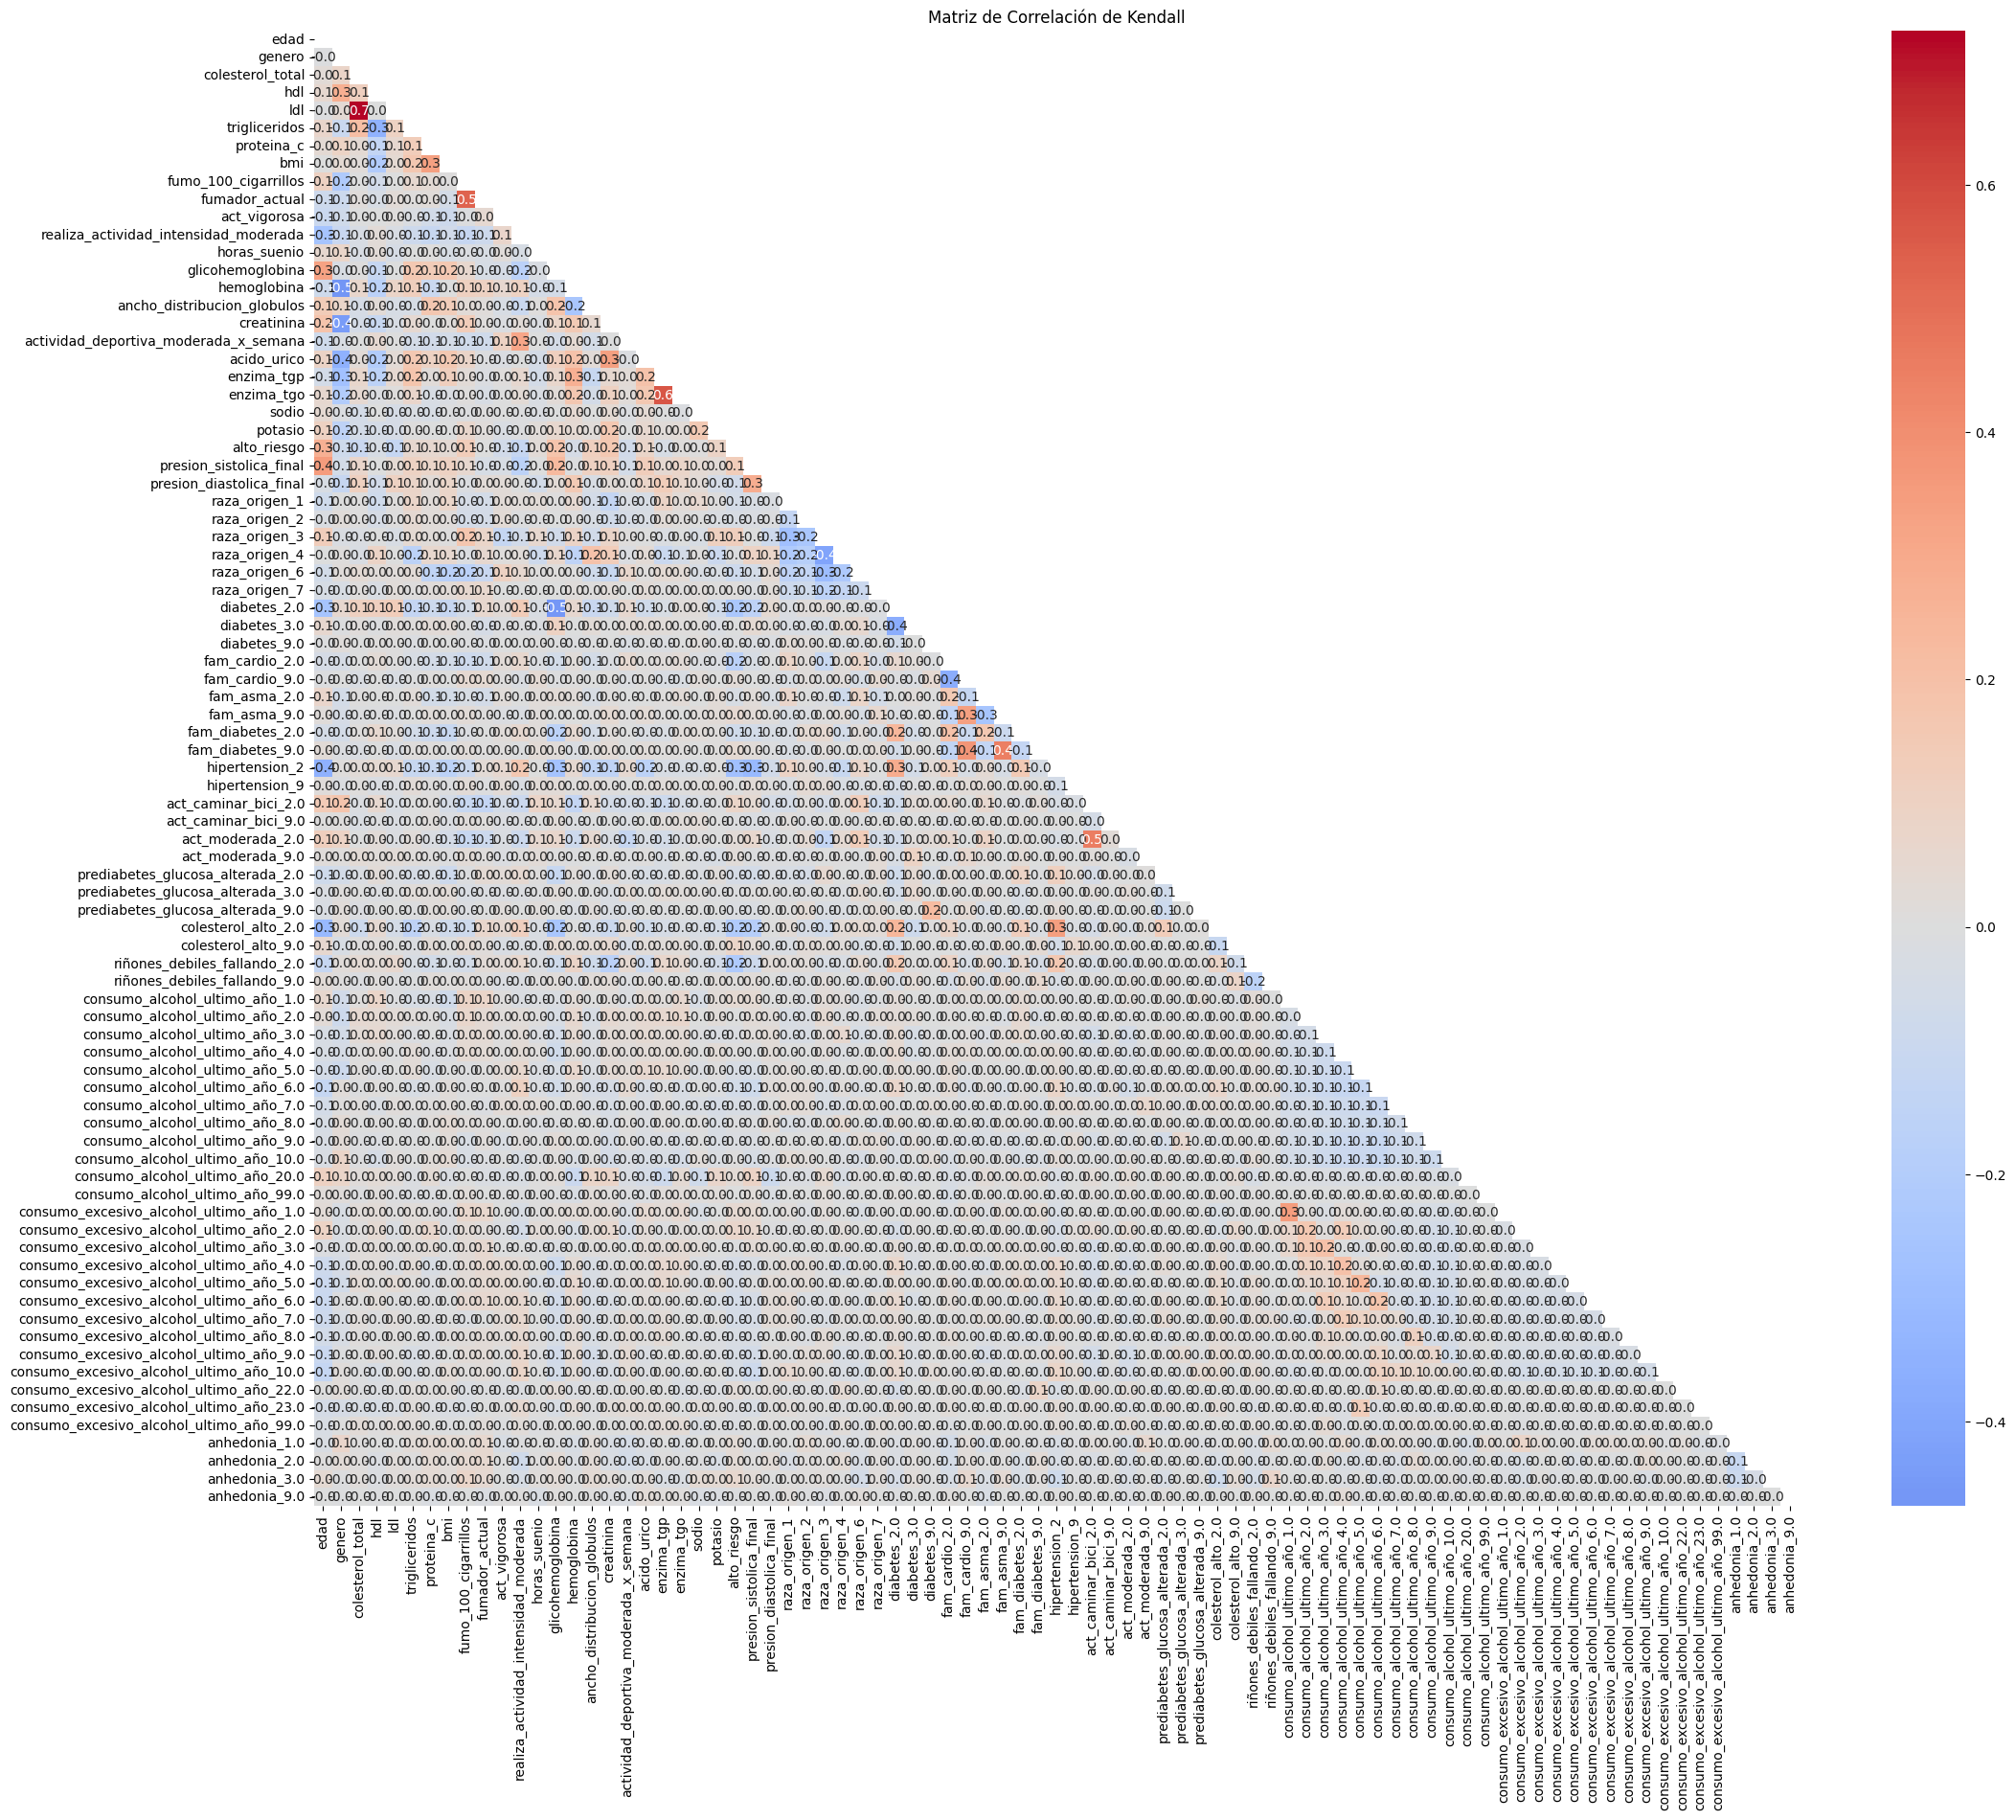

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creamos una copia para no alterar el original durante el gráfico
df_corr = df_train.copy()

plt.figure(figsize=(25,20))
# Usamos un umbral para que solo resalte lo que realmente está muy correlacionado
mask = np.triu(np.ones_like(df_corr.corr(method='kendall'), dtype=bool))
sns.heatmap(df_corr.corr(method='kendall'), mask=mask, annot=True, fmt=".1f", cmap="coolwarm", center=0)
plt.title("Matriz de Correlación de Kendall")
plt.show()

### **ANOVA**

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Separamos X e y
X_train = df_train.drop(columns=['alto_riesgo'])
y_train = df_train['alto_riesgo']

# Seleccionamos las mejores 40 numéricas
selector_anova = SelectKBest(score_func=f_classif, k=40)
X_train_anova = selector_anova.fit_transform(X_train, y_train)

# Ver cuáles ganaron
selected_features = X_train.columns[selector_anova.get_support()]
scores = selector_anova.scores_[selector_anova.get_support()]

print("🏆 Top 40 Variables según ANOVA:")
for f, s in sorted(zip(selected_features, scores), key=lambda x: x[1], reverse=True):
    print(f"{f}: {s:.2f}")

🏆 Top 40 Variables según ANOVA:
edad: 557.26
hipertension_2: 376.73
diabetes_2.0: 263.17
riñones_debiles_fallando_2.0: 211.90
colesterol_alto_2.0: 208.53
glicohemoglobina: 180.13
creatinina: 145.24
fam_cardio_2.0: 139.04
presion_sistolica_final: 128.02
ldl: 87.01
fumo_100_cigarrillos: 80.71
colesterol_total: 79.57
ancho_distribucion_globulos: 77.80
raza_origen_3: 65.56
realiza_actividad_intensidad_moderada: 61.32
potasio: 50.53
acido_urico: 41.70
raza_origen_6: 30.08
presion_diastolica_final: 24.76
genero: 24.18
colesterol_alto_9.0: 24.13
act_caminar_bici_2.0: 23.57
proteina_c: 23.13
fam_diabetes_2.0: 21.34
consumo_excesivo_alcohol_ultimo_año_2.0: 20.89
act_vigorosa: 19.37
actividad_deportiva_moderada_x_semana: 17.33
consumo_alcohol_ultimo_año_6.0: 16.29
anhedonia_3.0: 15.39
hemoglobina: 15.14
raza_origen_1: 13.81
trigliceridos: 13.47
enzima_tgp: 12.80
consumo_excesivo_alcohol_ultimo_año_6.0: 12.36
consumo_excesivo_alcohol_ultimo_año_1.0: 10.52
fam_asma_9.0: 10.46
consumo_excesivo_alco

### **Información Mutua**

In [ ]:
from sklearn.feature_selection import mutual_info_classif

selector_mi = SelectKBest(score_func=mutual_info_classif, k=40)
X_train_mi = selector_mi.fit_transform(X_train, y_train)

selected_features_mi = X_train.columns[selector_mi.get_support()]
scores_mi = selector_mi.scores_[selector_mi.get_support()]

print("\n💡 Top 40 Variables según Información Mutua:")
for f, s in sorted(zip(selected_features_mi, scores_mi), key=lambda x: x[1], reverse=True):
    print(f"{f}: {s:.4f}")


💡 Top 40 Variables según Información Mutua:
edad: 0.0621
hipertension_2: 0.0362
glicohemoglobina: 0.0277
creatinina: 0.0260
colesterol_alto_2.0: 0.0195
diabetes_2.0: 0.0176
riñones_debiles_fallando_2.0: 0.0172
ldl: 0.0160
presion_sistolica_final: 0.0141
trigliceridos: 0.0126
enzima_tgp: 0.0123
genero: 0.0121
presion_diastolica_final: 0.0121
potasio: 0.0116
hdl: 0.0092
fumo_100_cigarrillos: 0.0092
fam_diabetes_2.0: 0.0091
ancho_distribucion_globulos: 0.0088
consumo_alcohol_ultimo_año_9.0: 0.0088
consumo_alcohol_ultimo_año_6.0: 0.0088
fam_cardio_2.0: 0.0085
acido_urico: 0.0080
consumo_alcohol_ultimo_año_4.0: 0.0079
consumo_excesivo_alcohol_ultimo_año_7.0: 0.0075
consumo_alcohol_ultimo_año_99.0: 0.0075
consumo_excesivo_alcohol_ultimo_año_5.0: 0.0066
hemoglobina: 0.0062
sodio: 0.0060
anhedonia_3.0: 0.0057
consumo_alcohol_ultimo_año_2.0: 0.0057
realiza_actividad_intensidad_moderada: 0.0055
act_moderada_2.0: 0.0054
bmi: 0.0051
consumo_excesivo_alcohol_ultimo_año_23.0: 0.0048
colesterol_tota

In [ ]:
# 1. Unimos las mejores columnas de ambos métodos (evitando duplicados)
mejores_anova = list(selected_features)
mejores_mi = list(selected_features_mi)

# Creamos la lista final de features (Unión)
features_finales = list(set(mejores_anova + mejores_mi))

# 2. Creamos los datasets finales solo con esas variables + el target
X_train_final = df_train[features_finales]
X_test_final = df_test[features_finales]

y_train = df_train['alto_riesgo']
y_test = df_test['alto_riesgo']

print(f"✅ Selección terminada. Pasamos de 41 variables a {len(features_finales)} variables de alta calidad.")
print(f"Variables seleccionadas: {features_finales}")

✅ Selección terminada. Pasamos de 41 variables a 50 variables de alta calidad.
Variables seleccionadas: ['ldl', 'consumo_alcohol_ultimo_año_2.0', 'fumo_100_cigarrillos', 'consumo_excesivo_alcohol_ultimo_año_23.0', 'colesterol_alto_2.0', 'consumo_alcohol_ultimo_año_6.0', 'consumo_excesivo_alcohol_ultimo_año_6.0', 'enzima_tgp', 'riñones_debiles_fallando_9.0', 'hipertension_2', 'act_moderada_2.0', 'consumo_excesivo_alcohol_ultimo_año_5.0', 'raza_origen_4', 'fam_asma_9.0', 'sodio', 'consumo_alcohol_ultimo_año_9.0', 'bmi', 'raza_origen_6', 'riñones_debiles_fallando_2.0', 'trigliceridos', 'glicohemoglobina', 'ancho_distribucion_globulos', 'genero', 'actividad_deportiva_moderada_x_semana', 'raza_origen_1', 'act_caminar_bici_2.0', 'act_vigorosa', 'presion_sistolica_final', 'presion_diastolica_final', 'fam_diabetes_9.0', 'consumo_alcohol_ultimo_año_4.0', 'diabetes_2.0', 'fam_diabetes_2.0', 'hdl', 'potasio', 'consumo_alcohol_ultimo_año_99.0', 'creatinina', 'realiza_actividad_intensidad_moderada'

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Seleccionamos las variables numéricas y escaladas (X_train)
X_vif = df_train.drop(columns=['alto_riesgo'])

# Calculamos el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]

# Mostramos las que tienen VIF alto (> 5)
print("🔍 Variables con posible redundancia (VIF > 5):")
print(vif_data[vif_data["VIF"] > 5].sort_values(by="VIF", ascending=False))

🔍 Variables con posible redundancia (VIF > 5):
             feature        VIF
27     raza_origen_3  81.561139
28     raza_origen_4  55.884084
29     raza_origen_6  33.728918
25     raza_origen_1  30.965725
26     raza_origen_2  23.233529
2   colesterol_total  21.243838
4                ldl  15.588485
30     raza_origen_7  12.230362
5      trigliceridos   5.516432
3                hdl   5.158784


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4454 entries, 4331 to 685
Data columns (total 83 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   edad                                      4454 non-null   float64
 1   genero                                    4454 non-null   int64  
 2   colesterol_total                          4454 non-null   float64
 3   hdl                                       4454 non-null   float64
 4   ldl                                       4454 non-null   float64
 5   trigliceridos                             4454 non-null   float64
 6   proteina_c                                4454 non-null   float64
 7   bmi                                       4454 non-null   float64
 8   fumo_100_cigarrillos                      4454 non-null   int64  
 9   fumador_actual                            4454 non-null   float64
 10  act_vigorosa                           

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1114 entries, 2007 to 2284
Data columns (total 83 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   edad                                      1114 non-null   float64
 1   genero                                    1114 non-null   int64  
 2   colesterol_total                          1114 non-null   float64
 3   hdl                                       1114 non-null   float64
 4   ldl                                       1114 non-null   float64
 5   trigliceridos                             1114 non-null   float64
 6   proteina_c                                1114 non-null   float64
 7   bmi                                       1114 non-null   float64
 8   fumo_100_cigarrillos                      1114 non-null   int64  
 9   fumador_actual                            1114 non-null   float64
 10  act_vigorosa                          

mirando correlacion

In [ ]:
# columnas_a_borrar = [

# ]

# # Borramos las columnas en df_train y df_test
# # errors='ignore' evita que el código falle si alguna columna ya fue borrada antes
# df_train = df_train.drop(columns=columnas_a_borrar, errors='ignore')
# df_test = df_test.drop(columns=columnas_a_borrar, errors='ignore')

# print(f"Columnas eliminadas. Nuevo tamaño de df_train: {df_train.shape}")
# print(f"Columnas eliminadas. Nuevo tamaño de df_test: {df_test.shape}")

In [ ]:
# Guardar como CSV
df_train.to_csv('/content/drive/My Drive/NHANES/dataset_train_imputado.csv',index=False, encoding='utf-8')
df_test.to_csv('/content/drive/My Drive/NHANES/dataset_test_imputado.csv',index=False, encoding='utf-8')

-------------------------------------------------------------------